# Statistics

## Package Load

In [3]:
import random
import numpy as np
import pandas as pd

import pingouin as pg
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive Statistics

### (1) Data

#### Univariable data

In [100]:
fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

#### Multivariable data
- 열이 변수의 의미를 가지에 해야 분석이 용이
- 행 하나에 1개의 결과가 있도록 정리

In [7]:
state = pd.read_csv("./Practical_Statictics/data/state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [8]:
shoes = pd.read_csv("./stats_for_python/3-2-2-shoes.csv")
shoes

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [9]:
fish_multi = pd.read_csv("./stats_for_python/3-2-1-fish_multi.csv")
fish_multi

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [10]:
### Grouping
group = fish_multi.groupby("species")
group.mean()

,length
species,
A,3.0
B,8.0


In [11]:
group.std(ddof = 1)

,length
species,
A,1.0
B,2.0


In [12]:
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [13]:
### Contingency table
cross = pd.pivot_table(
    data = shoes,
    values = "sales",
    aggfunc = "sum",
    index = "store",
    columns = "color"
)
cross

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [14]:
lc_loans = pd.read_csv("./Practical_Statictics/data/lc_loans.csv")

In [15]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [16]:
df = crosstab.copy().loc['A':'G', :]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


### (2) Numerical Descriptives

#### Measures of central location

In [17]:
### sum
fish_data.sum()

40

In [18]:
### length
len(fish_data)

10

In [19]:
### mean
fish_data.mean()

4.0

In [20]:
state['Population'].mean()

6162876.3

In [38]:
### geometric mean
# 곱셈으로 계산하는 값들의 평균
stats.gmean([1.0, 0.00001, 10000000000.])

46.415888336127786

In [39]:
### harmonic mean
# 변화율의 평균
stats.hmean([1.0, 0.00001, 10000000000.])

2.9999700002999947e-05

In [42]:
### trim mean
stats.trim_mean(fish_data, 0.2) # trim 비율도 파라미터로 들어감

4.0

In [43]:
stats.trim_mean(state['Population'], 0.1)

4783697.125

In [44]:
### Median
np.median(fish_data)

4.0

In [45]:
state['Population'].median()

4436369.5

In [46]:
# 이상치의 영향
fish_data_2 = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 100])
print(np.mean(fish_data_2), np.median(fish_data_2))

13.4 4.0


In [47]:
### weighted mean
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [48]:
### mode
stats.mode(fish_data)

ModeResult(mode=4, count=4)

In [240]:
stats.mode(state['Murder.Rate'])

ModeResult(mode=1.6, count=3)

In [244]:
state['Murder.Rate'].mode()

0    1.6
1    2.0
2    5.7
Name: Murder.Rate, dtype: float64

#### Measures of variability

In [51]:
### variance
# np.var(fish_data, ddof=0) # 동일
fish_data.var()

1.2

In [52]:
### Unbiased variance
# N-1로 나눔
np.var(fish_data, ddof=1) 

1.3333333333333333

In [53]:
### Std. deviation
# np.std(fish_data, ddof=0)
np.std(fish_data, ddof=1)

1.1547005383792515

In [54]:
state['Population'].std()

6848235.347401142

In [55]:
### Standardization
# 평균 0, 표준편차 1
print(np.mean((fish_data - fish_data.mean())/np.std(fish_data, ddof=0)))
print(np.std((fish_data - fish_data.mean())/np.std(fish_data, ddof=0)))

2.2204460492503132e-17
1.0


In [61]:
### Coefficient of Vriation
# 변동계수
# SD/mean

# max variation along rows of A; 
# rows: axis=0, cols: axis=1
# = np.std(fish_data, ddof=1)/np.mean(fish_data)
stats.variation(fish_data, axis=0, ddof=1) # 모집단의 변동계수

0.28867513459481287

In [22]:
from statsmodels import robust

In [23]:
### MAD (Mean Absolute Deviation from the median)
# 중간값과의 편차의 절댓값의 중간값
robust.scale.mad(state['Population'])

3849876.1459979336

In [63]:
### Mean absolute deviation
# 편차 절대평균
def mean_absolute_deviation(data, axis=None):
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

mean_absolute_deviation(state['Population'])

4450933.356000001

In [17]:
### Maximum, Minimum
### Range: Max - Min
fish_data.max() - fish_data.min()

4

In [19]:
### Quantile, Percentile
### IQR: Inter Quantile Range
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [21]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [20]:
fish_data_3 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(np.percentile(fish_data_3, 25), np.percentile(fish_data_3, 75))

3.0 7.0


#### Measures of Relationship

In [42]:
### Covariance
cov_data = pd.read_csv("./stats_for_python/3-2-3-cov.csv")
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [44]:
x = cov_data["x"]
y = cov_data["y"]

np.cov(x, y, ddof=0)

array([[ 3.2816,  6.906 ],
       [ 6.906 , 25.21  ]])

In [45]:
np.cov(x, y, ddof=1)

array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [47]:
### Correlation
# N이든 N-1이든 동일한 값이 됨
cov_data.corr()

,x,y
x,1.000000,0.759272
y,0.759272,1.000000


In [25]:
sp500_sym = pd.read_csv("./Practical_Statictics/data/sp500_sectors.csv")
sp500_px = pd.read_csv("./Practical_Statictics/data/sp500_data.csv.gz", index_col=0)

In [27]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


#### Measure of distribution shape

In [260]:
### Skewness
# DataFrame/Series 형태로 변경하여 출력
state['Population'].skew()

2.6426346412748765

In [261]:
### Kurtosis
state['Population'].kurtosis()

8.722114728161502

#### Permutation & Combination

In [247]:
import itertools

In [251]:
tmp_list = list(range(10))
perm = len(list(itertools.permutations(tmp_list, 3)))
comb = len(list(itertools.combinations(tmp_list, 3)))
print(perm, comb)

720 120


In [245]:
from math import perm
from math import comb

In [246]:
### Python 3.8 이상에 적용
print(perm(10, 3))
print(comb(10, 3))

720
120


### (3) Discrete Probability Distribution

#### Binomial
- 베르누이 시행: 2 종류의 결과 중 하나만 발생시키는 시행
- 성공확률 p, N 회의 독립 베르누이 시행을 했을 때, 성공한 횟수 X의 확률분포

In [198]:
# PMF
stats.binom.pmf(k=1, n=2, p=0.5) # 성공횟수, 시행횟수, 성공확률

0.5000000000000002

In [52]:
# CDF
stats.binom.cdf(k=2, n=5, p=0.1)

0.99144

In [211]:
np.random.seed(1)
stats.binom.rvs(n=10, p=0.2, size=5) # 시행횟수 n, 성공확률 p, 5번 반복 sampling

array([2, 3, 0, 1, 1])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


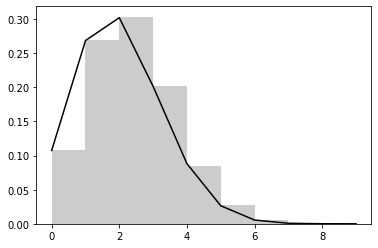

In [221]:
binomial = stats.binom(n=10, p=0.2)

np.random.seed(1)
rvs_binomial = binomial.rvs(size=10000)

m = np.arange(0, 10, 1)
sns.distplot(rvs_binomial, bins=m, kde=False, norm_hist=True, color='gray')
plt.plot(m, binomial.pmf(k=m), color='black')
plt.show()

#### Poisson
- 카운트 데이터 (0 이상의 정수)의 확률분포
- p -> 0, N -> Inf의 조건에서 이항분포 Np=λ

In [70]:
stats.poisson.pmf(k=2, mu=5)

0.08422433748856832

In [71]:
stats.poisson.cdf(k=2, mu=5)

0.12465201948308108

In [223]:
# λ=2인 Possion
np.random.seed(1)
stats.poisson.rvs(mu=2, size=5)

array([2, 1, 0, 1, 2])

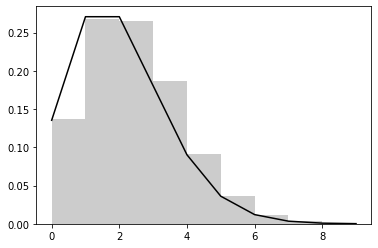

In [225]:
poisson = stats.poisson(mu=2)

np.random.seed(1)
rvs_poisson = poisson.rvs(size = 10000)
pmf_poisson = poisson.pmf(k=m)

sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True, color='gray')
plt.plot(m, pmf_poisson, color='black')

Mean: N*p = 2.0


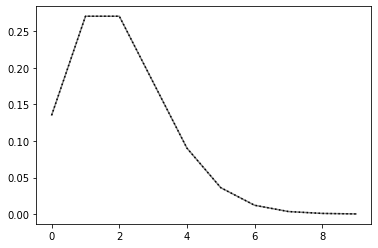

In [229]:
# N이 크고 p가 작을 때의 이항분포
N = 100000000
p = 0.00000002
print("Mean: N*p =", N*p)
binomial_2 = stats.binom(n=N, p=p)

pmf_binomial_2 = binomial_2.pmf(k=m)

sns.lineplot(x=m, y=pmf_poisson, color='gray')
sns.lineplot(x=m, y=pmf_binomial_2, color='black', linestyle='dotted')
plt.show()

#### Negative Binomial
- 카운트 데이터의 확률분포
- 성공 횟수 r회가 될 때까지의 시행횟수를 확률변수로 둠
- Poission보다 분산이 큰 경우

In [73]:
n, p = 5, 0.5 # 0.5 확률의 시행을 5회 성공할 때까의 시행횟수가 확률변수
mean, var, skew, kurt = stats.nbinom.stats(n, p, moments='mvsk')

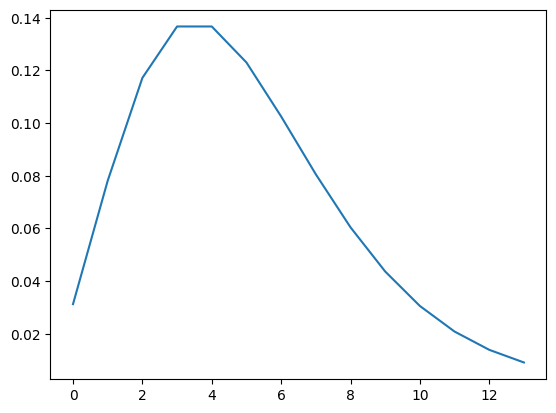

In [82]:
x = np.arange(stats.nbinom.ppf(0.01, n, p), stats.nbinom.ppf(0.99, n, p))
sns.lineplot(stats.nbinom(n, p).pmf(x))
plt.show()

#### Geometric
- 1회 성공까지의 시행횟수가 확률변수
- Negative Binomial의 특수 케이스

In [83]:
p = 0.5
mean, var, skew, kurt = stats.geom.stats(p, moments='mvsk')

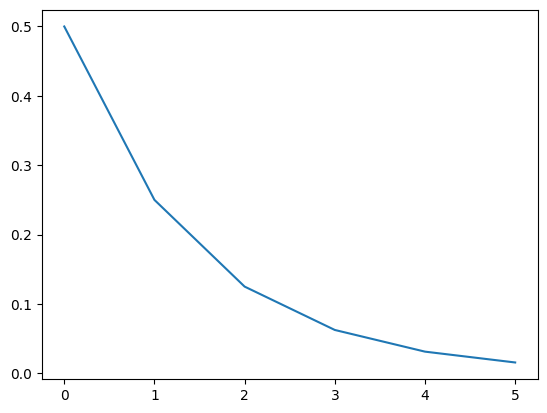

In [84]:
x = np.arange(stats.geom.ppf(0.01, p), stats.geom.ppf(0.99, p))
sns.lineplot(stats.geom(p).pmf(x))
plt.show()

#### Hypergeometric
- 비복원 추출(독립이 아닌) 사건에서의 이항확률분포
- 모집단 개수 N, 모집단에서 사건이 일어난 횟수 D, 샘플 개수 n
- p = D/N
- X: 표본에서 사건의 개수에 해당하는 개수
- 평균 np, 표준편차 np(1-p)((N-n)/(N-1)) 

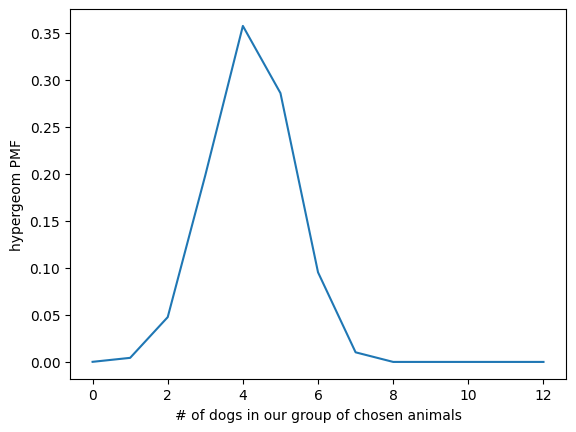

In [69]:
[N, D, n] = [20, 7, 12]

rv = stats.hypergeom(N, D, n)
x = np.arange(0, n + 1)

pmf_dogs = rv.pmf(x)

fig = plt.figure()

sns.lineplot(x=x, y=pmf_dogs)
plt.xlabel('# of dogs in our group of chosen animals')
plt.ylabel('hypergeom PMF')
plt.show()

### (4) Continuous Probability Distribution

#### Uniform

#### Normal

In [105]:
### PDF
stats.norm.pdf(loc=4, scale=0.8, x=3) # 확률변수 x가 3일때의 확률값

0.2283113567362774

In [106]:
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

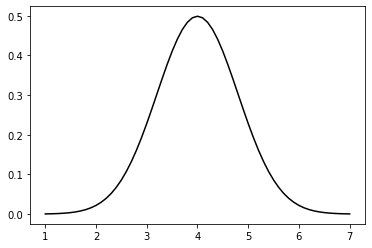

In [108]:
x_plot = np.arange(start=1, stop=7.1, step=0.1)
sns.lineplot(x=x_plot, y=stats.norm.pdf(x=x_plot, loc=4, scale=0.8), color = 'black')
plt.show()

In [115]:
### CDF
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.10564977366685535

In [14]:
### PPF (Percent Point Function)
# 누적확률이 q가 되는 확률변수 값
stats.norm.ppf(loc=4, scale=0.8, q=0.025)

2.432

In [116]:
sitagawa = stats.norm.cdf(loc=4, scale=0.8, x=3)
stats.norm.ppf(loc=4, scale=0.8, q=sitagawa)

3.0000000000000004

In [117]:
# q가 0.5인 지점 = 평균
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

#### Student T

<AxesSubplot:>

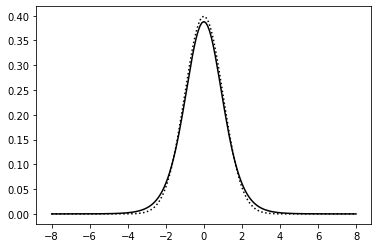

In [119]:
# 평균 0, 분산 n/(n-2)
# n이 커지면 표준정규분포에 근사
x = np.arange(start=-8, stop=8.1, step=0.1)
sns.lineplot(x=x, y=stats.norm.pdf(x=x), color='black', linestyle='dotted')
sns.lineplot(x=x, y=stats.t.pdf(x=x, df=9), color='black')

#### Chi-square

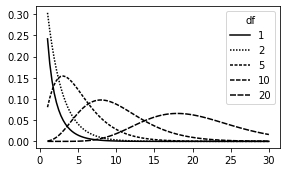

In [88]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label='10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label='20')
ax.legend(title='df')

plt.tight_layout()
plt.show()

#### F

In [236]:
stats.f.pdf(sorted(x), dfn=1, dfd=10)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 2.96111864,
       0.82471909, 0.6493823 , 0.59567695, 0.51713732, 0.45601642,
       0.36384133, 0.30593269, 0.29729442, 0.25485809, 0.21867202,
       0.19283397, 0.17661331, 0.14955182, 0.07337274, 0.07170382])

#### Exponential
- 한 사건이 일어날때까지의 시간이나 거리에 대한 분포

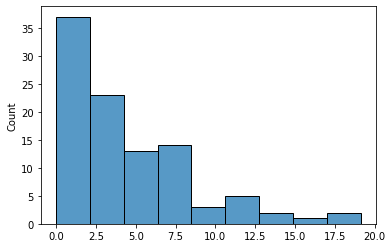

In [53]:
sample = stats.expon.rvs(scale=5, size=100) # 주기별 평균 사건 수 5
sns.histplot(sample)
plt.show()

####  Weibull
- 사건 발생률이 시간에 따라 변화
    - beta > 1이면 발생률이 시간이 지남에 따라 증가, 작으면 감소
- 지수분포의 일반화 버전

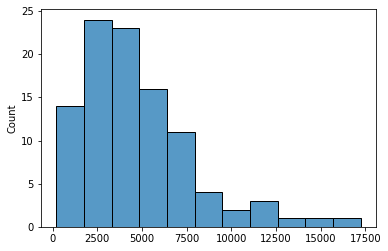

In [54]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100) # beta 1.5
sns.histplot(sample)
plt.show()

#### Gamma

## Inference Basic

### (1) Sampling

#### Bootstrap
- 모집단으로부터 얻은 복원추출 표본

In [44]:
from sklearn.utils import resample

In [45]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -79.64349999999831
std. error: 220.543118062375


#### Random sampling

In [48]:
fish_5 = np.array([2, 3, 4, 5, 6])
fish_5

array([2, 3, 4, 5, 6])

In [50]:
### Sampling
print(np.random.choice(fish_5, size=1, replace=False))
print(np.random.choice(fish_5, size=3, replace=False))

[3]
[6 4 3]


In [52]:
### Random.seed
# sample 고정
np.random.seed(1)
print(np.random.choice(fish_5, size=3, replace=False))
print(np.random.choice(fish_5, size=3, replace=False))

[4 3 6]
[2 4 6]


In [53]:
### Sample mean
np.mean(np.random.choice(fish_5, size=3, replace=False))

4.0

#### Stratified sampling

#### Cluster sampling

#### Systemetic sampling

### (2) Sampling distribution

In [62]:
# 분포에서 샘플링
sampling_norm = stats.norm.rvs(loc=4, scale=0.8, size=10)
sampling_norm

array([5.26620184, 3.16388254, 4.20607481, 2.43248432, 2.79375387,
       3.74776634, 4.68654309, 4.05707439, 2.16615258, 2.86755801])

In [63]:
np.mean(sampling_norm)

3.538749179953464

In [65]:
# 평균 4, 표준편차 0.8인 정규분포
population = stats.norm(loc=4, scale=0.8)

In [69]:
# 표본평균 여러 번 계산하기
sample_mean_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)

sample_mean_array

array([3.92228729, 3.86432929, 4.06953003, ..., 4.13616562, 4.57489661,
       4.09896685])

In [70]:
# Sample의 평균과 표준편차
print(np.mean(sample_mean_array), np.std(sample_mean_array, ddof=1))

4.004202422791747 0.2513580850860402


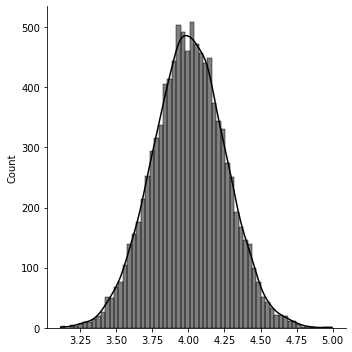

In [73]:
sns.displot(sample_mean_array, color='black', kde=True)
plt.show()

In [75]:
### Sample size에 따른 평균과 표준편차의 변화
size_array = np.arange(start=10, stop=100100, step=100)
sample_mean_array_size = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


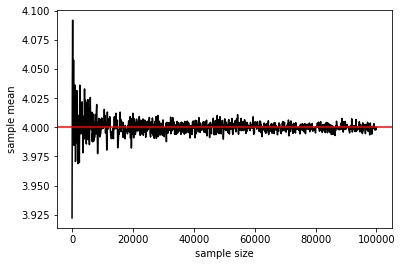

In [80]:
sns.lineplot(size_array, sample_mean_array_size, color='black')
plt.axhline(4, color='red')
plt.xlabel("sample size")
plt.ylabel("sample mean")
plt.show()

In [81]:
# 표본평균 계산 함수
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [83]:
# 10000개 표본평균의 평균
np.random.seed(1)
np.mean(calc_sample_mean(size=10, n_trial=10000))

4.004202422791747

In [84]:
# Sample size와 표본평균
np.random.seed(1)

size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})

size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})

size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})


sim_result = pd.concat([size_10_df, size_20_df, size_30_df])

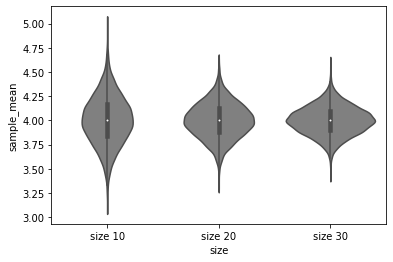

In [86]:
sns.violinplot(x="size", y="sample_mean", data=sim_result, color='gray')
plt.show()

In [40]:
loans_income = pd.read_csv("./Practical_Statictics/data/loans_income.csv").squeeze('columns')

In [87]:
# 표본평균의 표준편차
size_array = np.arange(start=2, stop=102, step=2)
sample_mean_std_array = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

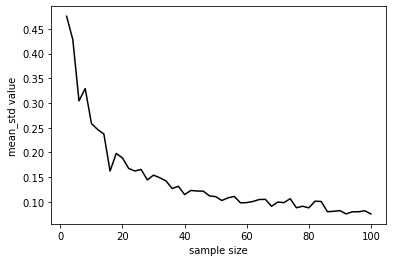

In [89]:
sns.lineplot(x=size_array, y=sample_mean_std_array, color='black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")
plt.show()

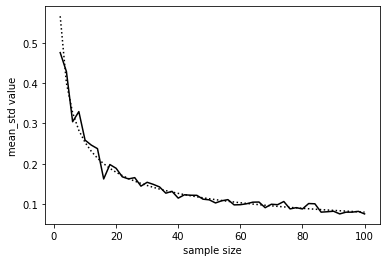

In [91]:
# Standard error
standard_error = 0.8 / np.sqrt(size_array)
sns.lineplot(x=size_array, y=sample_mean_std_array, color='black')
sns.lineplot(x=size_array, y=standard_error, color='black', linestyle='dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")
plt.show()

In [98]:
# 표본분산의 평균 (Unbiased variance)
sample_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=1)
    
np.mean(sample_var_array)

0.6385429863702334

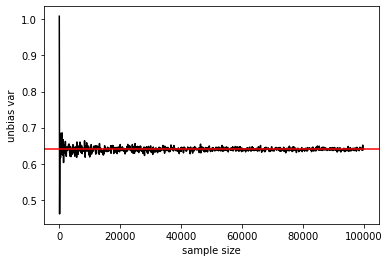

In [100]:
# 표본분산과 모분산의 관계
size_array =  np.arange(start=10, stop=100100, step=100)
unbias_var_array_size = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof=1)
    
sns.lineplot(x=size_array, y=unbias_var_array_size, color='black')
plt.axhline(0.8**2, color='red')
plt.xlabel("sample size")
plt.ylabel("unbias var")
plt.show()

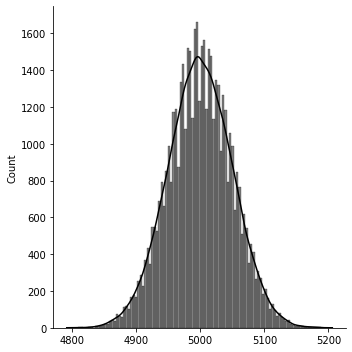

In [110]:
### Central Limit Theorem
n_size = 10000
n_trial = 50000

coin = np.array([0, 1])
count_coin = np.zeros(n_trial)
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(np.random.choice(coin, size=n_size, replace=True))

sns.displot(count_coin, color='black', kde=True)
plt.show()

In [41]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

,income,type
48856,57000.0,Data
48354,120000.0,Data
15907,60000.0,Data
38335,65000.0,Data
29788,85000.0,Data


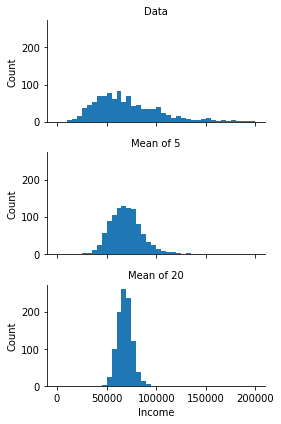

In [42]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### (3) Estimation
- Point estimation
- Interval estimation

In [105]:
fish = pd.read_csv("./stats_for_python/3-7-1-fish_length.csv")["length"]

#### Point estimation

In [106]:
# mean
mu = np.mean(fish)
mu

4.187039324504523

In [107]:
# variance
sigma_2 = np.var(fish, ddof=1)
sigma_2

0.6803017080832623

#### Interval estimation

In [89]:
### 표본평균에 대한 구간추정
# 정규분포로 구간추정: 모표준편차가 알려진 경우
data = np.random.randint(10, 30, 50)

# create 95% confidence interval for population mean
# sem: standard error of the mean
stats.norm.interval(confidence=0.95, loc=np.mean(data), scale=stats.sem(data))

(18.36832412713266, 21.63167587286734)

In [110]:
# T분포로 구간추정: 모표준편차를 모르는 경우
df = len(fish) - 1 # Degree of Freedom: n - 1
sigma = np.std(fish, ddof=1)
se = sigma / np.sqrt(len(fish))

# 신뢰계수(alpha), df, 표본평균, 표준오차
interval = stats.t.interval(confidence=0.95, df=df, loc=mu, scale=se)
interval

(3.597010056835825, 4.777068592173221)

In [ ]:
from statsmodels.stats.proportion import proportion_confint

In [123]:
### Minimum Sample n
# 오차 d를 통한 sample size 계산
d = 0.1
estimated_n = (stats.norm.ppf(0.975)*(sigma/d))**2
estimated_n

261.33509972497285

In [133]:
### 표본표준편차, 신뢰도, 샘플 개수에 따른 구간의 길이
# 표본표준편차 * 10
se2 = (sigma*10) / np.sqrt(len(fish))
stats.t.interval(confidence=0.95, df=df, loc=mu, scale=se2)

(-1.7665784470738055, 10.034006906300164)

In [136]:
# 샘플 개수
df2 = (len(fish)*10) - 1
se3 = sigma / np.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95, df=df2, loc=mu, scale=se3)

(3.9700552133860953, 4.297373245840263)

In [135]:
# 신뢰도
stats.t.interval(alpha=0.99, df=df, loc=mu, scale=se)

(3.2860728200500535, 4.981355639176305)

In [128]:
### Interval estimation 해석
# 여러 번 추정 수행 시, 신뢰구간이 모평균을 포함하는 비율
be_included_array = np.zeros(20000, dtype = "bool")

np.random.seed(1)
norm_dist = stats.norm(loc=4, scale=0.8)
for i in range(0, 20000):
    sample = norm_dist.rvs(size=10)
    df = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof=1)
    se = std / sp.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if(interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True

/var/folders/cb/__k37xkx4s324t8t_p2bgr4w0000gn/T/ipykernel_47020/4101375539.py:11: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se = std / sp.sqrt(len(sample))


In [129]:
sum(be_included_array) / len(be_included_array)

0.948

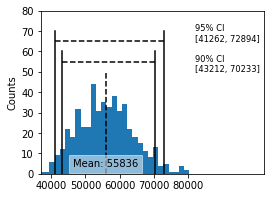

In [48]:
# CI 도식화
print(loans_income.mean())

np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')
plt.show()

In [124]:
### 표본비율 구간추정
# p-hat = x-bar/n
# 표준오차: sqrt(p(1-p)/n) -> p를 p-hat으로 대체하여 사용
# X ~ B(n, p)이므로, Z = (X - np)/sqrt(np(1-p)) ~ N(0, 1)

p_hat = 41/500
se = np.sqrt((p_hat*(1 - p_hat))/500)
stats.norm.interval(confidence=0.95, loc=p_hat, scale=se)

(0.05795131379112069, 0.10604868620887932)

In [27]:
from statsmodels.stats.proportion import proportion_confint

In [28]:
proportion_confint(41, 500, alpha=0.05, method='normal') # 동일한 결과

(0.05795131379112069, 0.10604868620887932)

In [129]:
### Minimum Sample n
# 오차 d를 통한 sample size 계산
# p(1-p)는 최댓값 0.25로 치환
d = 0.1
estimated_n = ((stats.norm.ppf(0.975)/d)**2)/4
estimated_n

96.03647051735311

In [145]:
### 분산과 표준편차 구간추정
# 모집단의 정규분포 가정 필수
# (n-1)(s**2)/sigma**2 ~ chisq(n-1)
# (n-1)(s**2)/chisq(alpha/2)(n-1) < sigma**2 < (n-1)(s**2)/chisq(1-alpha/2)(n-1)
alpha=0.05
n = len(fish)
var = np.var(fish)
interval = ((n - 1) * var)/stats.chi2.ppf(1-(alpha/2), df=n-1), ((n - 1) * var)/stats.chi2.ppf(alpha/2, df=n-1)
interval

(0.28967623922045205, 2.040610747269794)

In [165]:
### 독립적인 두 개 집단의 차이 구간추정
# 표본이 큰 경우
data_1 = np.random.randint(10, 30, 50)
data_2 = np.random.randint(15, 30, 50)

stats.norm.interval(confidence=0.95, loc=np.mean(data_1 - data_2), scale=np.var(data_1)/len(data_1) + np.var(data_2)/len(data_2))

(-3.758536075755802, 0.23853607575580216)

In [203]:
# 표본이 작은 경우
# 정규분포 가정이 필수. 정규분포 가정이 없으면 비모수적 방법 사용
# 비모수적 방법..?
data_1 = np.random.normal(10, 5, 15)
data_2 = np.random.normal(15, 5, 10)

n_1 = len(data_1)
n_2 = len(data_2)
s_pooled = ((n_1 - 1)*np.var(data_1) + (n_2 - 1)*np.var(data_2)) / (n_1 + n_2 - 1)

stats.t.interval(confidence=0.95, df=n_1 + n_2 - 2, loc=np.mean(data_1) - np.mean(data_2), scale=s_pooled) # 분산이 같은 경우

(-45.94765595981078, 35.35029726204656)

In [214]:
data_1 = np.random.normal(10, 5, 15)
data_2 = np.random.normal(15, 2, 10)

n_1 = len(data_1)
n_2 = len(data_2)

df = ((np.var(data_1)/n_1) + (np.var(data_2)/n_2))**2 / (((np.var(data_1)/n_1)**2/(n_1 - 1)) + ((np.var(data_2)/n_2)**2/(n_1 - 1))) # df = min([n_1, n_2]) 를 사용하기도 함
stats.t.interval(confidence=0.95, df=df, loc=np.mean(data_1) - np.mean(data_2), scale=(np.var(data_1)/n_1) + (np.var(data_2)/n_2)) # 분산이 다른 경우

(-11.901543968962468, -4.150411083422678)

In [226]:
### 두 개 집단의 비율 차이 구간추정
# Z = (p-hat_1 - p-hat_2)/sqrt(((p_1*(1-p_1))/n_1) + ((p_2*(1-p_2))/n_2)) ~ N(0, 1)
p_1 = 0.6
p_2 = 0.5
n_1 = 10
n_2 = 12

se = np.sqrt(((p_1*(1 - p_1))/n_1) + ((p_2*(1 - p_2))/n_2))
stats.norm.interval(confidence=0.95, loc=np.mean(p_1 - p_2), scale=se)

(-0.3150004864990562, 0.5150004864990562)

### (4) Testing
- 귀무가설과 대립가설
- P-value
- 유의수준
- 단측검정/양측검정
    - alternative: less, greater(larger) / two-sided
- 제 1종 오류와 제 2종 오류: 1종 오류만 컨트롤 가능
- 신뢰구간과 양측검정
    - 신뢰구간 안에 검정할 모수가 들어가면 귀무가설 기각하지 않음
<br><br>
- A/B Test
    - 두 그룹 비교
    - 실험군과 대조군, 임의화 (처리 적용 대상 임의로 결정)
<br><br>
- Multi-armed bandit
    - 전통적인 A/B test가 어려운 경우
        - 표본의 크기가 충분하지 않은 경우
        - 실험이 끝나기 전에, 이미 얻은 결과들을 이용하는 경우
        - 추가적으로 들어오는 데이터를 바탕으로 다른 것 시도
    - Epsilon-greedy algorithm
        - 0~1 사이의 난수 생성
        - 난수가 0과 Epsilon 사이이면, 동전 뒤집기 (50/50) 시행
        - 앞면이면 제안 A, 뒷면이면 제안 B
        - 난수가 Epsilon보다 크면, 지금까지 가장 좋은 결과를 보인 제안 표시
    - Thompson's sampling
        - 표본을 추출하여, 최고의 손잡이를 선택할 확률 최대화
        - Beta distribution (Bayes 사전 분포) 사용

#### Resampling and Permutation test
- 두 개 이상의 표본을 결합하여 관측값을 무작위로(또는 전체를) 추출하는 과정
- 관측 데이터로부터 반복해서 표본추출

In [3]:
WEB_PAGE_DATA_CSV = DATA / 'web_page_data.csv'
FOUR_SESSIONS_CSV = DATA / 'four_sessions.csv'
CLICK_RATE_CSV = DATA / 'click_rates.csv'
IMANISHI_CSV = DATA / 'imanishi_data.csv'

In [55]:
### T-test
session_times = pd.read_csv("./Practical_Statictics/data/web_page_data.csv")
session_times.Time = 100 * session_times.Time

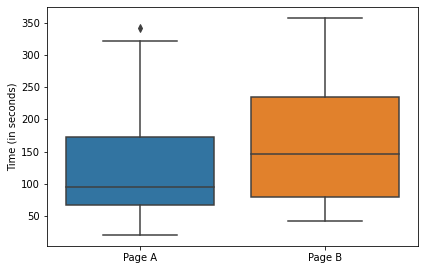

In [57]:
sns.boxplot(x='Page', y='Time', data=session_times)
plt.xlabel('')
plt.ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [58]:
# 관측된 차이
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


In [63]:
import random

In [65]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

-17.019047619047598


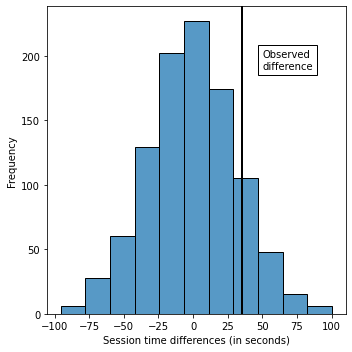

In [69]:
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

sns.histplot(x=perm_diffs, bins=11)
plt.axvline(x = mean_b - mean_a, color='black', lw=2)
plt.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
plt.xlabel('Session time differences (in seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [71]:
# convert perm_diffs to numpy array
perm_diffs = np.array(perm_diffs)
np.mean(perm_diffs > mean_b - mean_a)

0.121

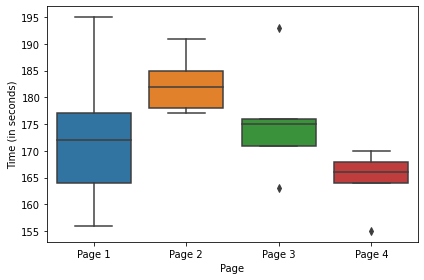

In [75]:
### ANOVA
four_sessions = pd.read_csv("./Practical_Statictics/data/four_sessions.csv")

sns.boxplot(x='Page', y='Time', data=four_sessions)
plt.xlabel('Page')
plt.ylabel('Time (in seconds)')
plt.title('')
plt.tight_layout()
plt.show()

In [76]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)
# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    
    return df.groupby('Page').mean().var()[0]
    
print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
44.51999999999992


Pr(Prob) 0.07866666666666666


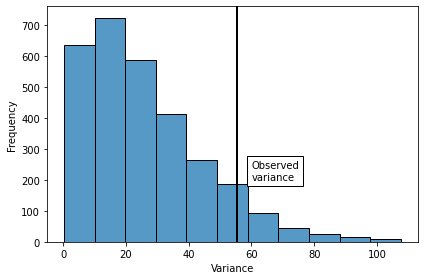

In [78]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

sns.histplot(x=perm_variance, bins=11)
plt.axvline(x = observed_variance, color='black', lw=2)
plt.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
plt.xlabel('Variance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [146]:
### Chi-sq test
click_rate = pd.read_csv("./Practical_Statictics/data/click_rates.csv")
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [147]:
row_average = clicks.mean(axis=1)
pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})

,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [149]:
import random

In [150]:
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    random.shuffle(box)
    sample_clicks = [sum(box[0:1000]),
                     sum(box[1000:2000]),
                     sum(box[2000:3000])]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4765


In [25]:
expected = [expected_clicks, expected_noclicks]
def sample_with_replacement(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [sample_with_replacement(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4845


#### Statistical test
- 일부만 수록하고, 자세한 내용은 아래에서 확인

In [137]:
# One sample test
junk_food = pd.read_csv("./stats_for_python/3-8-1-junk-food-weight.csv")["weight"]
junk_food.head()

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

귀무가설: 봉지과자의 평균중량은 50g이다 <br>
대립가설: 봉지과자의 평균중량은 50g이 아니다

In [139]:
# T-test는 모집단의 정규분포 가정 필요
stats.ttest_1samp(junk_food, 50, alternative='two-sided')

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

In [140]:
# Paired test
paired_test_data = pd.read_csv("./stats_for_python/3-9-1-paired-t-test.csv")
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


In [142]:
# 데이터 정리
before = np.array(paired_test_data.query('medicine == "before"')["body_temperature"])
after = np.array(paired_test_data.query('medicine == "after"')["body_temperature"])

diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

귀무가설: 약을 먹기 전과 후의 체온에는 차이가 없다 (d=0) <br>
대립가설: 약이 먹기 전과 후의 체온에는 차이가 있다 (d!=0)

In [143]:
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [144]:
stats.ttest_rel(after, before)

Ttest_relResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [145]:
# Independent test
stats.ttest_ind(after, before, equal_var=False) # 원래는 이 데이터로 하면 안 됨

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

In [146]:
### Chi-sq test
click_data = pd.read_csv("./stats_for_python/3-10-1-click_data.csv")
print(click_data)

  color  click  freq
0  blue  click    20
1  blue    not   230
2   red  click    10
3   red    not    40


In [147]:
# 분할표 생성
cross = pd.pivot_table(
    data=click_data,
    values="freq",
    aggfunc="sum",
    index="color",
    columns="click"
)
cross

click,click,not
color,,
blue,20,230
red,10,40


In [148]:
# 동질성 검정
sp.stats.chi2_contingency(cross, correction=False) # 통계량, p-value, df, expected table

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

In [72]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


In [ ]:
from statsmodels.stats import power

In [93]:
### Test power
# 일정 수준 이상의 power를 얻기 위한 표본 수 계산
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011) # p1, p2
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger') # 단측 검정
print('Sample Size: %.3f' % result)

Sample Size: 116602.393


In [94]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408


## Pre-test Analysis
- 통계분석 전 사전 수행해야 하는 test
- 정규성 확인, 등분산성 확인 등

### (1) Normality

귀무가설(H0) <br>
데이터의 분포는 정규분포를 따른다.<br>
대립가설(H1)<br>
데이터의 분포는 정규분포를 따르지 않는다.<br>

In [110]:
cats = pd.read_csv('./ADP_book_ver01/data/cats.csv')

In [3]:
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


#### Shapiro-wilk test

In [4]:
stats.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

#### Kolmogorov-smirnov (K-S) test
- 두 집단의 분포 비교. 데이터와 Normal distribution 제시

In [5]:
stats.kstest(cats['Bwt'], stats.norm.cdf)

KstestResult(statistic=0.9772498680518208, pvalue=5.089961007561737e-237)

#### Anderson-darling test
- 데이터 개수가 많은 경우 (5000개 이상?)

In [6]:
stats.anderson(cats['Bwt'], dist='norm')

AndersonResult(statistic=1.9228438994888393, critical_values=array([0.561, 0.639, 0.767, 0.894, 1.064]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

[결과해석] <br>
유의수준보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다. 즉, cats 데이이터의 Bwt 변수는 정규분포를 따르지 않는다.

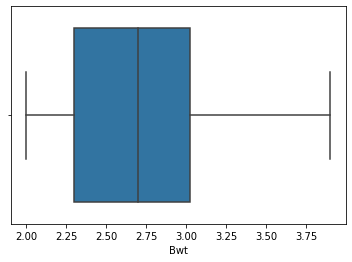

In [7]:
### Boxplot
sns.boxplot(x=cats.Bwt)
plt.show()

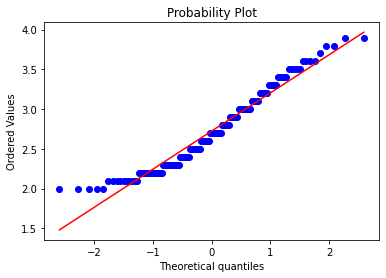

In [8]:
### Q-Q plot
stats.probplot(cats.Bwt, dist="norm", plot=plt)
plt.show()

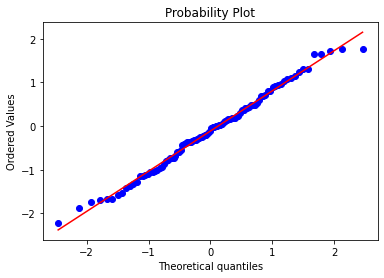

In [50]:
stats.probplot(stats.norm.rvs(size=100), plot=plt)
plt.show()

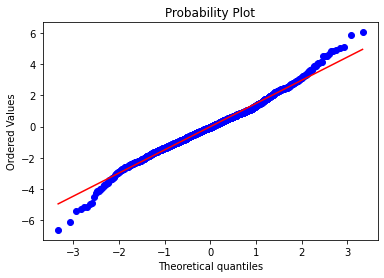

In [51]:
# not normal: 긴 꼬리 분포
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx > 0]))

stats.probplot(nflx, plot=plt)
plt.show()

In [9]:
### Skewness, Kurtosis
# Normal의 왜도, 첨도는 0, 3
cats.Bwt.skew()

0.47862437175650524

In [10]:
cats.Bwt.kurtosis()

-0.6738392606733399

### (2) Equal variance

귀무가설(H0) <br>
집단 간 분산 차이가 없다.<br>
대립가설(H1)<br>
집단 간 분산 차이가 있다.<br>

In [11]:
female = cats.loc[cats.Sex=='F', 'Bwt']
male = cats.loc[cats.Sex=='M', 'Bwt']

#### Levene test
- 모집단이 정규분포가 아닌 경우에도 사용할 수 있음
- median 척도가 default -> Brown-Forsythe test

In [12]:
stats.levene(female, male, center='mean')

LeveneResult(statistic=17.201368589463517, pvalue=5.759437452845422e-05)

In [13]:
stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

#### Fligner test
- 모집단이 정규분포가 아닌 경우에도 사용할 수 있음. (Levene 보다 더 Robust test)

In [14]:
stats.fligner(female, male, center='mean')

FlignerResult(statistic=16.302435204533868, pvalue=5.399451767224612e-05)

In [15]:
stats.fligner(female, male)

FlignerResult(statistic=16.909233669160688, pvalue=3.921038124917857e-05)

#### Bartlett test
- 정규성 필요. 모집단이 정규분포인 경우 정확도가 높음
- 집단 내 데이터 수가 달라도 가능

In [16]:
stats.bartlett(female, male)

BartlettResult(statistic=15.074702450407873, pvalue=0.00010333894088535893)

#### F-test
- 두 집단 분산의 비율 검정
- 정규성 필요 

## Sample tests
- 한 개, 또는 두 개 집단 비교

### (1) One sample test
- 연속형인 한 개 집단 검정
- T-test는 모집단의 정규분포 가정이 필요하며, 정규성이 깨지면 비모수적 방법 시행

#### Binomial probability test

In [213]:
stats.binomtest(k=1, n=10, p=0.5, alternative='two-sided') # 성공횟수, 시행횟수, 성공확률

BinomTestResult(k=1, n=10, alternative='two-sided', statistic=0.1, pvalue=0.021484375)

#### Mean test
- Z-test: 데이터가 충분히 크거나 모분산을 알고 있는 경우
- T-test, Wilcoxon signed rank test (Sign test)

In [197]:
statsmodels.stats.weightstats.ztest(x, x2=None, value=0, alternative='two-sided')

(0.44248287230132394, 0.6581398217440044)

In [17]:
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


Bwt 컬럼은 고양이의 몸무게를 의미하고, Hwt는 고양이의 길이를 의미한다. 
cats의 데이터의 정보를 info로 확인해준다. 

In [18]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


shapiro test를 통해 데이터의 정규성을 검정한다. 고양이의 몸무게를 검정하므로 고양이의 몸무게만 추출하여 shapiro test를 진행해야 한다.

In [19]:
mu = 2.6
stats.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

데이터가 정규분포를 따르지 않으므로 wilcox test를 진행한다. 

귀무가설(H0) <br>
고양이의 평균 몸무게는 2.6kg이다. -> 고양이의 몸무게 - 2.6kg의 평균은 0이다.<br><br>
대립가설(H1)<br>
고양이의 평균 몸무게는 2.6kg이 아니다 <br>

In [20]:
### Wilcoxon signed rank test
# 평균을 빼주는 이유는, signed rank test가 원래 paired sample용임.
# sign test도 사용 가능
stats.wilcoxon(cats.Bwt - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

H0 기각. 유의수준 0.05 하에서 고양이의 평균 몸무게는 2.6kg이라고 할 수 없다.

In [21]:
#### (참고) T-test
# stats.ttest_1samp(cats.Bwt, popmean=mu)

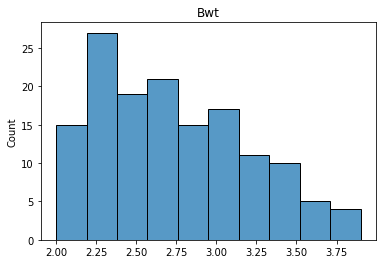

In [22]:
sns.histplot(cats.Bwt.values, bins=10)
plt.title('Bwt')
plt.ylabel('Count')
plt.show()

#### Proportion test
- 정규분포를 이용한 집단의 비율 검정

H0: p = p0 (population proportion is equal to hypothesized proportion p0)

H1 (two-tailed): p ≠ p0 (two-tailed population proportion is not equal to some hypothesized value p0) <br>
H1 (left-tailed): p < p0 (left-tailed population proportion is less than some hypothesized value p0) <br>
H1 (right-tailed): p > p0 (right-tailed population proportion is greater than some hypothesized value p0)

In [193]:
# count: 성공 횟수, nobs: 전체 시행 횟수 -> 표본비율 = count/nobs
# value: 검정할 모비율
# returns z-stat, p-value
statsmodels.stats.proportion.proportions_ztest(count=70, nobs=100, value=0.86, alternative='smaller') # smaller, larger, two-side

(-3.4914862437758782, 0.0002401705999909348)

#### Variance test
- 정규성 가정이 필수 

In [126]:
def chi_var_test(x, va0, direction="two-tailed"):
    n = len(x)
    chi_stat = (n - 1) * np.var(x) / va0 
    tmp_p = stats.chi2.cdf(chi_stat, df=n-1)
    
    if direction == "lower":
        p = tmp_p
    elif direction == "upper":
        p = 1 - tmp_p 
    else:
        p = 2*(1-tmp_p) if tmp_p > 0.5 else 2*tmp_p
    
    return chi_stat, p

x = np.random.normal(0, 2, 25)
chi_var_test(x, va0=9)

(5.919007786566385, 0.00012581594052354377)

In [ ]:
### if not normal
# Squared Ranks test for Variances

### (2) Paired sample test
- 단일 모집단의 어떠한 처리 전후에 따른 평균 차이 비교
- Paired T-test, Wilcoxon signed rank test

In [10]:
# 데이터 불러오기 및 확인
data = {'before':[7, 3, 4, 5, 2, 1, 6, 6, 5, 4],
       'after':[8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}
data = pd.DataFrame(data)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


귀무가설(H0) <br>
수면제 복용 전과 후의 수면시간 차이는 없다. (D=0)<br>
대립가설(H1)<br>
수면제 복용 전과 후의 수면시간 차이는 있다. <br>


In [24]:
### Normality test
stats.shapiro(data.before)

ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425)

In [25]:
stats.shapiro(data.after)

ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642)

두 집단 다 정규성을 만족하므로, Paired T-test를 진행한다.

In [26]:
stats.ttest_rel(data['after'], data['before'], alternative='greater') # H1: D > 0

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082764)

In [27]:
data.mean()

before    4.3
after     5.3
dtype: float64

[결과해석]
p-value가 유의수준보다 작으므로 '수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다'는 결론을 낼 수 있다. 

In [28]:
### (참고) Wilcoxon signed rank test
# 두 데이터의 차이 배열을 input으로 함
# 비모수 검정의 p-value가 높음 -> 검정력이 떨어짐
stats.wilcoxon(data['after']-data['before'], alternative='greater')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_morestats.py:3159: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=36.0, pvalue=0.00414960799764038)

In [ ]:
### (참고) Sign test
# Ordinal data
# 두 집단의 대소 비교하여, 이항검정 또는 정규근사 활용
# H0: p = 0.5
# n = 동률이 아닌 데이터 수
# z = x - np/sqrt(np(1-p)) ~ N(0, 1)

In [9]:
from statsmodels.stats import descriptivestats

In [13]:
stat, p = descriptivestats.sign_test(data['after']-data['before'], mu0=0)
print("single sample sign test p-value", p) # 양측 검정만 가능. H1: p != 0.5

single sample sign test p-value 0.0078125


In [24]:
plus = (data['after'] - data['before'] > 0).sum()
minus = (data['after'] - data['before'] < 0).sum()

stats.binomtest(k=plus, n=plus + minus, p=0.5, alternative='two-sided') # 위 결과와 동일

BinomTestResult(k=8, n=8, alternative='two-sided', proportion_estimate=1.0, pvalue=0.0078125)

In [25]:
stats.binomtest(k=plus, n=plus + minus, p=0.5, alternative='greater') # H1: p > 0.5. + 확률이 0.5보다 큰가? after의 수면시간이 더 길어지는지 검정

BinomTestResult(k=8, n=8, alternative='greater', proportion_estimate=1.0, pvalue=0.00390625)

### (3) Independent Two-sample test
- 두 개의 독립된 모집단 비교
- 표본 크기가 충분한 경우, 정규분포를 이용한 test 가능
    - X_bar - Y_bar ~ N(mu_1 - mu_2, ((sigma_1)**2/n_1 + (sigma_2)**2/n_2))
- T-test, Wilcoxon Rank sum test / Mann-Whitney U test
- T-test의 경우 집단 간 등분산 검정 먼저 수행 -> equal_var 파라미터 입력

In [198]:
# 참고: Two sample z-test
#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

statsmodels.stats.weightstats.ztest(cityA, cityB, value=0, alternative='two-sided')

(-1.9953236073282115, 0.046007596761332065)

In [111]:
female = cats.loc[cats.Sex=='F', 'Bwt']
male = cats.loc[cats.Sex=='M', 'Bwt']

귀무가설(H0) <br>
암컷 고양이와 수컷 고양이의 몸무게는 차이가 없다.<br>
대립가설(H1)<br>
암컷 고양이와 수컷 고양이의 몸무게는 차이가 있다. <br>

In [112]:
### Normality test
stats.shapiro(female) # not normal

ShapiroResult(statistic=0.8909613490104675, pvalue=0.0003754299250431359)

In [113]:
stats.shapiro(male)

ShapiroResult(statistic=0.9788321852684021, pvalue=0.11895745247602463)

정규성을 만족시키지 못하는 집단이 있으므로, Wilcoxon Rank sum test를 진행한다.

In [114]:
stats.ranksums(female, male, alternative='two-sided')

RanksumsResult(statistic=-6.484649068728496, pvalue=8.893855174450822e-11)

In [115]:
stats.mannwhitneyu(female, male, alternative='two-sided')

MannwhitneyuResult(statistic=757.5, pvalue=8.200502234321752e-11)

In [116]:
### (참고) Independent T-test
stats.ttest_ind(female, male, equal_var=False) # 등분산성 만족이 안 되는 경우

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

[결과해석]
p-value가 유의수준보다 작으므로 '암컷 고양이와 수컷 고양이의 몸무게는 차이가 있다'는 결론을 낼 수 있다.

In [117]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


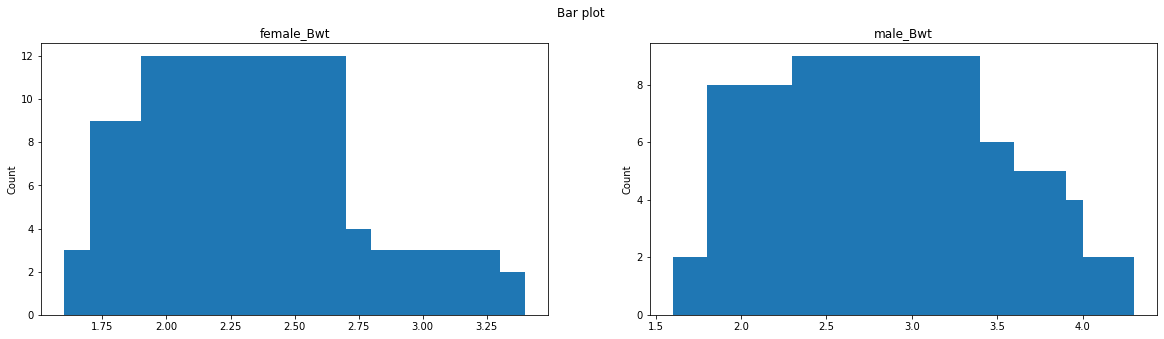

In [36]:
female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)

fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()

In [221]:
### Proportion difference test (Z-statistic)
success_cnts = np.array([70, 80])
total_cnts = np.array([100, 120])

test_stat, pval = statsmodels.stats.proportion.proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('Two sided z-test: z = {:.4f}, p value = {:.4f}'.format(test_stat, pval))

Two sided z-test: z = 0.5285, p value = 0.5971


In [121]:
### Variance difference test (F-test)
# 두 집단의 분산 차이 검정. 정규성에 민감
# 위에서 언급된 Equal Variance 검정 방법을 사용하는 것이 더 좋음
def f_var_test(x, y, direction="two-tailed"):
    df_1 = len(x)
    df_2 = len(y)
    f_stat = np.var(x, ddof=1) / np.var(y, ddof=1)
    
    tmp_p = stats.f.cdf(f_stat, df_1, df_2)
    if direction == "lower":
        p = tmp_p
    elif direction == "upper":
        p = 1 - tmp_p 
    else:
        p = 2*(1-tmp_p) if tmp_p > 0.5 else 2*tmp_p
    return f_stat, p

f_var_test(male, female)

(2.9111958307660704, 9.872708416591713e-05)

## ANOVA
- 두 개 이상의 다수 집단 간 평균 비교
- 종속변수는 연속형, 독립변수는 범주형
- 각 집단의 정규분포 가정과 집단 내 등분산 가정이 필요하며, 이 가정이 깨지면 Welch의 방법 또는 비모수적 방법 시행
- 사후 검정: 적어도 한 집단에서 평균 차이가 있음이 증명되었을 때, 어떤 집단에서 차이가 존재하는지를 알아보는 방법

### (1) One-way
- 종속변수에 대한 하나의 범주형 변수의 영향 파악
- 각 집단 간 표본의 수는 동일하지 않아도 됨
- ANOVA (F-test), Kruskal-Wallis test

In [174]:
### Simple data
weather = ["cloudy", "cloudy", "rainy", "rainy", "sunny", "sunny"]
beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({
    "beer"   : beer,
    "weather": weather
})

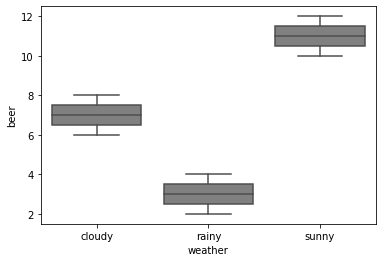

In [176]:
sns.boxplot(x="weather", y="beer", data=weather_beer, color='gray')
plt.show()

In [178]:
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


In [177]:
anova_model = ols("beer ~ weather", data=weather_beer).fit()

In [23]:
# Predicted
anova_model.fittedvalues

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [24]:
# Residuals
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [22]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [64]:
iris = pd.read_csv("./ADP_book_ver01/data/iris.csv")
iris.head(100)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [65]:
iris["target"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [66]:
iris.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [67]:
target_list = iris["target"].unique()
setosa = iris[iris["target"]==target_list[0]]["sepal width"]
versicolor = iris[iris["target"]==target_list[1]]["sepal width"]
virginica = iris[iris["target"]==target_list[2]]["sepal width"]
print(target_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


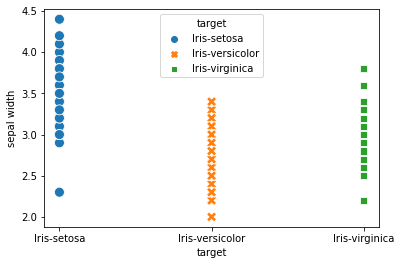

In [68]:
# Scatter plot by Groups
sns.scatterplot(x='target', 
                y='sepal width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=100, # marker size
                data=iris)
plt.show()

귀무가설(H0) <br>
세가지 종에 대해 sepal width의 평균 차이가 없다.<br>
대립가설(H1)<br>
적어도 하나의 종에 대한 sepal width의 평균 차이가 있다. <br>

In [69]:
### Normality test
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


두 집단 다 정규성을 만족하므로, ANOVA를 진행한다.

In [70]:
### Equal variance test
# Levene test
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [71]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

[결과해석]
p-value가 유의수준보다 작으므로 '세가지 종의 꽃받침 폭의 평균은 차이가 있다'는 결론을 낼 수 있다.

In [72]:
### (참고) Kruskal-Wallis test
# 서열 척도 이상의 데이터에 사용
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [75]:
### (참고) Mood's Median Test
# 세 개 이상의 독립 표본을 대상으로 이들이 추출된 모집단의 median 비교 test
stats.median_test(setosa, versicolor, virginica)

(50.22477971587844,
 1.2411596758086846e-11,
 3.0,
 array([[42,  8, 17],
        [ 8, 42, 33]]))

In [46]:
### if not equal variance
# Transformation / Scaling
# Welch's ANOVA

In [47]:
### (참고) Welch's ANOVA
pg.welch_anova(data=iris, dv='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


### (2) Two-way
- 하나의 종속변수 (연속형) 에 대한 두 개의 독립변수(범주형)의 영향을 알아보는 방법
- 교호작용 검증 필요. 교호작용이 있는 경우 주효과 검정은 의미가 없다
- ANOVA (F-test), Friedman test

In [48]:
mtcars = pd.read_csv('./ADP_book_ver01/data/mtcars.csv', index_col='Unnamed: 0')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [49]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [50]:
am0 = mtcars[mtcars.am==0]
am1 = mtcars[mtcars.am==1]

cyl4 = mtcars[mtcars.cyl==4]
cyl6 = mtcars[mtcars.cyl==6]
cyl8 = mtcars[mtcars.cyl==8]

In [51]:
### Normality test
# mpg data is normal
print(stats.shapiro(am0['mpg']))
print(stats.shapiro(am1['mpg']))

print(stats.shapiro(cyl4['mpg']))
print(stats.shapiro(cyl6['mpg']))
print(stats.shapiro(cyl8['mpg']))

ShapiroResult(statistic=0.976774275302887, pvalue=0.8987362384796143)
ShapiroResult(statistic=0.9458035826683044, pvalue=0.536271333694458)
ShapiroResult(statistic=0.9124391078948975, pvalue=0.2605923116207123)
ShapiroResult(statistic=0.8990352153778076, pvalue=0.32517871260643005)
ShapiroResult(statistic=0.9317529201507568, pvalue=0.322853684425354)


In [52]:
### Equal variance test
# not equal variance
stats.levene(am0['mpg'], am1['mpg'])

LeveneResult(statistic=4.1876255537753995, pvalue=0.04957067404156203)

In [53]:
stats.levene(cyl4['mpg'], cyl6['mpg'], cyl8['mpg'])

LeveneResult(statistic=5.507064861977649, pvalue=0.009390247105110484)

In [54]:
mtcars['mpg_sqrt'] = np.sqrt(mtcars.mpg)

In [55]:
am0 = mtcars[mtcars.am==0]
am1 = mtcars[mtcars.am==1]

cyl4 = mtcars[mtcars.cyl==4]
cyl6 = mtcars[mtcars.cyl==6]
cyl8 = mtcars[mtcars.cyl==8]

In [56]:
stats.levene(am0['mpg_sqrt'], am1['mpg_sqrt'])

LeveneResult(statistic=1.8507055090956186, pvalue=0.1838361585926835)

In [57]:
stats.levene(cyl4['mpg_sqrt'], cyl6['mpg_sqrt'], cyl8['mpg_sqrt'])

LeveneResult(statistic=2.8688891317752816, pvalue=0.07296950644913348)

가설은 총 3가지로 정의할 수 있고, 상호작용 효과를 가장 먼저 검증한다.<br> <br>
귀무가설(H0) <br>
변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다.<br>
대립가설(H1)<br>
변속기 종류와 실린더 개수 간에는 상호작용 효과가 있다.<br><br>
귀무가설(H0) <br>
실린더 개수에 따른 주행거리의 차이는 없다.<br>
대립가설(H1)<br>
실린더 개수에 따른 주행거리의 차이가 있다.<br><br>
귀무가설(H0) <br>
변속기 종류에 따른 주행거리의 차이는 없다.<br>
대립가설(H1)<br>
변속기 종류에 따른 주행거리의 차이는 있다. <br>


In [58]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [59]:
### Two-way ANOVA
formula = 'mpg_sqrt ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()

aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),5.634040,2.0,24.915357,9.050376e-07
C(am),0.387832,1.0,3.430212,7.540130e-02
C(cyl):C(am),0.209114,2.0,0.924763,4.092816e-01
Residual,2.939654,26.0,NaN,NaN


[결과해석]
교호작용의 p-value가 유의수준보다 크므로, 실린더 개수와 변속기 종류 간에는 교호작용이 존재하지 않는다. <br>
실린더 개수 변수에 대한 p-value는 유의수준보다 작으므로, 주효과 검정에서 귀무가설을 기각한다. 따라서 실린더 개수에 따른 주행거리 평균의 차이가 난다. <br>
변속기 종류 변수에 대한 p-value는 유의수준보다 크므로, 주효과 검정에서 귀무가설을 기각하지 않는다. 따라서 변속기 종류에 따른 주행거리 평균은 차이가 없다고 볼 수 있다.

In [60]:
from statsmodels.graphics.factorplots import interaction_plot

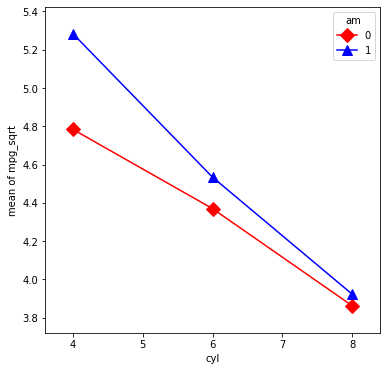

In [61]:
### interaction plot
# 교호작용 확인
# 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 
cyl = mtcars["cyl"]
am = mtcars["am"]
mpg = mtcars["mpg_sqrt"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cyl, am, mpg, colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax) # 변수는 x1, x2 y 순

In [62]:
### (참고) Friedman test
# non-parametric ANOVA with blocked design
# 교호작용에 대한 검정은 Rank 특성 상 어려움
pg.friedman(data=mtcars, dv="mpg", within="am", subject="cyl")

,Source,W,ddof1,Q,p-unc
Friedman,am,1.0,1,3.0,0.083265


In [63]:
pg.friedman(data=mtcars, dv="mpg", within="cyl", subject="am")

,Source,W,ddof1,Q,p-unc
Friedman,cyl,1.0,2,4.0,0.135335


[결과해석]
실린더 개수 변수에 대한 p-value는 유의수준보다 작으므로 귀무가설을 기각한다. 따라서 실린더 개수에 따른 주행거리 차이는 없다고 볼 수 있다. <br>
변속기 종류 변수에 대한 p-value는 유의수준보다 크므로 귀무가설을 기각하지 않는다. 따라서 변속기 종류에 따른 주행거리는 차이가 난다.

### (3) ANCOVA
- 공변량의 영향을 고려한 분산분석
- 공변량은 연속형 변수
- ANOVA의 가정을 만족시켜야 함

In [65]:
### wt 변수를 공변량으로 설정하고, 실린더 개수 변수의 영향 측정
pg.ancova(data=mtcars, dv='mpg', covar='wt', between='cyl')

,Source,SS,DF,F,p-unc,np2
0,cyl,95.263290,2,7.285567,0.002835,0.342277
1,wt,118.203950,1,18.080056,0.000213,0.392362
2,Residual,183.058648,28,NaN,NaN,NaN


### (4) MANOVA
- 다변량 분산분석
- 종속변수 여러 개를 한 번에 검정
- 가정: 종속변수들의 정규성, Equal covariance

In [66]:
from statsmodels.multivariate.manova import MANOVA

In [67]:
maov = MANOVA.from_formula('cyl + am ~ mpg + wt', data=mtcars)
print(maov.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.5871 2.0000 28.0000  9.8475 0.0006
         Pillai's trace 0.4129 2.0000 28.0000  9.8475 0.0006
 Hotelling-Lawley trace 0.7034 2.0000 28.0000  9.8475 0.0006
    Roy's greatest root 0.7034 2.0000 28.0000  9.8475 0.0006
------------------------------------------------------------
                                                            
------------------------------------------------------------
          mpg           Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.6864 2.0000 28.0000  6.3955 0.0052
         Pillai's trace 0.3136 2.0000 28.0000  6.3955 0.0052
 Hotelling-Lawley trace 0.4568 2.0000 28.0

### (5) Post-hoc test

In [68]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from statsmodels.sandbox.stats.multicomp import multipletests

In [69]:
### Fisher's LSD & Bonferroni adjustment
# T-test를 여러 번 수행하는 것
# 비교 대상이 많을수록 검정력이 떨어짐
# Tukey 보다 엄격함
mc = MultiComparison(data=iris["sepal width"], groups=iris["target"])

ret = mc.allpairtest(stats.ttest_ind, method='bonf', alpha=0.05)
ret[0] # 모든 집단의 평균이 다르다.

group1,group2,stat,pval,pval_corr,reject
Iris-setosa,Iris-versicolor,9.2828,0.0,0.0,True
Iris-setosa,Iris-virginica,6.2894,0.0,0.0,True
Iris-versicolor,Iris-virginica,-3.2058,0.0018,0.0055,True


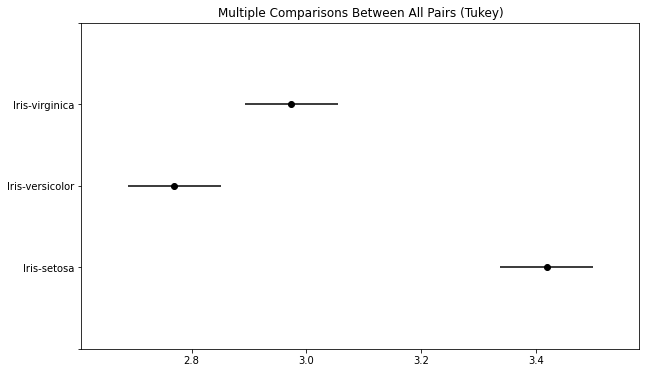

In [70]:
### Tukey's HSD
# Most powerful
# ANOVA 수행하지 않고도 결과를 볼 수 있음
# 집단별 sample 수가 동일해야 함
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()

In [71]:
tukeyhsd.summary() # 모든 집단의 평균이 다르다.

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [72]:
### (참고) pingouin 패키지 사용
pg.pairwise_tukey(data=iris, dv='sepal width', between='target')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Iris-setosa,Iris-versicolor,3.418,2.770,0.648,0.068084,9.517713,2.153833e-14,1.842310
1,Iris-setosa,Iris-virginica,3.418,2.974,0.444,0.068084,6.521396,3.147409e-09,1.248226
2,Iris-versicolor,Iris-virginica,2.770,2.974,-0.204,0.068084,-2.996317,8.952134e-03,-0.636233


In [73]:
# ! pip install scikit-posthocs
import scikit_posthocs as sp

In [74]:
### Scheffe
# 가장 엄격한 Test
sp.posthoc_scheffe(iris, group_col='target', val_col='sepal width')

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,1.000000e+00,4.730163e-16,7.739781e-09
Iris-versicolor,4.730163e-16,1.000000e+00,1.281402e-02
Iris-virginica,7.739781e-09,1.281402e-02,1.000000e+00


In [75]:
### Games Howell
# Equal variance가 아닌 경우 사용
# Welch's ANOVA의 사후검정 방법
pg.pairwise_gameshowell(data =iris, dv='sepal width', between='target')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Iris-setosa,Iris-versicolor,3.418,2.770,0.648,0.069807,9.282773,94.525878,0.000000e+00,1.842310
1,Iris-setosa,Iris-virginica,3.418,2.974,0.444,0.070595,6.289385,95.395253,2.869266e-08,1.248226
2,Iris-versicolor,Iris-virginica,2.770,2.974,-0.204,0.063635,-3.205761,97.926827,5.129567e-03,-0.636233


In [76]:
### Duncan
# 일반적으로는 추천되지 않음
# 집단 개수가 같을 때 사용
# 비모수 검정에 사용 가능
sp.posthoc_dunn(iris, group_col='target', val_col='sepal width', p_adjust='holm')

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,1.000000e+00,3.247311e-14,2.292201e-07
Iris-versicolor,3.247311e-14,1.000000e+00,1.521219e-02
Iris-virginica,2.292201e-07,1.521219e-02,1.000000e+00


In [77]:
### Mann-whitney
# Mann-whitney를 여러 번 수행하는 것
# 비모수적 검정
sp.posthoc_mannwhitney(iris, group_col='target', val_col='sepal width', alternative='two-sided') # 모든 집단의 평균이 다르다.

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,1.000000e+00,2.983442e-13,1.180877e-08
Iris-versicolor,2.983442e-13,1.000000e+00,4.572142e-03
Iris-virginica,1.180877e-08,4.572142e-03,1.000000e+00


In [78]:
### Nemenyi test
# Tukey's HSD for non-parametric
sp.posthoc_conover(np.array([setosa, versicolor, virginica])) # 모든 집단의 평균이 다르다.

,1,2,3
1,1.000000e+00,1.765695e-18,1.356705e-10
2,1.765695e-18,1.000000e+00,1.890443e-03
3,1.356705e-10,1.890443e-03,1.000000e+00


In [79]:
### Conover test
# 비모수적 검정
sp.posthoc_conover(np.array([setosa, versicolor, virginica])) # 모든 집단의 평균이 다르다.

,1,2,3
1,1.000000e+00,1.765695e-18,1.356705e-10
2,1.765695e-18,1.000000e+00,1.890443e-03
3,1.356705e-10,1.890443e-03,1.000000e+00


In [80]:
### Two-way 사후 검정
# 1개 요인만 유의하므로, One-way와 동일한 사후 검정 가능
mc = MultiComparison(data=mtcars["mpg_sqrt"], groups=mtcars["cyl"])

ret = mc.allpairtest(stats.ttest_ind, method='bonf', alpha=0.05)
ret[0] # 모든 집단의 평균이 다르다.

group1,group2,stat,pval,pval_corr,reject
4,6,4.0877,0.0009,0.0026,True
4,8,8.2611,0.0,0.0,True
6,8,4.1621,0.0005,0.0016,True


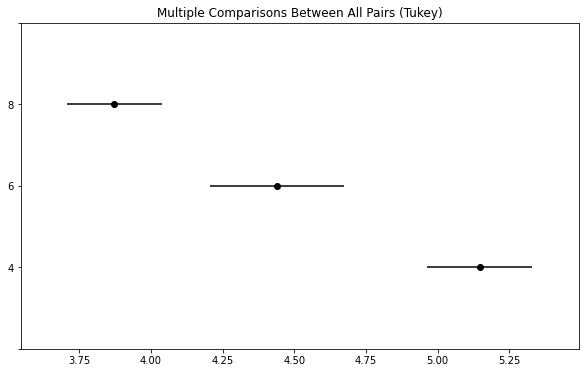

In [81]:
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()

In [82]:
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
4,6,-0.7064,0.0007,-1.1234,-0.2894,True
4,8,-1.275,0.0,-1.6224,-0.9275,True
6,8,-0.5686,0.004,-0.9678,-0.1693,True


In [83]:
# !pip install bioinfokit
from bioinfokit.analys import stat

In [84]:
### Tukey for two-way anova
result = stat()

result.tukey_hsd(df=mtcars, res_var='mpg_sqrt', xfac_var=['cyl', 'am'], anova_model=formula)
result.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(6, 1)","(6, 0)",0.164238,-0.624832,0.953308,0.904417,0.900000
1,"(6, 1)","(4, 1)",0.748787,0.049352,1.448223,4.651803,0.030753
2,"(6, 1)","(4, 0)",0.249253,-0.594298,1.092804,1.283926,0.900000
3,"(6, 1)","(8, 1)",0.610588,-0.332531,1.553706,2.813145,0.376069
4,"(6, 1)","(8, 0)",0.671048,0.004162,1.337934,4.372329,0.047942
5,"(6, 0)","(4, 1)",0.913025,0.280362,1.545688,6.270767,0.001872
6,"(6, 0)","(4, 0)",0.413491,-0.375579,1.202561,2.276991,0.587789
7,"(6, 0)","(8, 1)",0.446350,-0.448371,1.341071,2.167695,0.629995
8,"(6, 0)","(8, 0)",0.506810,-0.089671,1.103291,3.691981,0.130121
9,"(4, 1)","(4, 0)",0.499534,-0.199902,1.198970,3.103330,0.274180


In [85]:
### Two-way, Non-parametric 사후 검정
# Nemenyi
sp.posthoc_nemenyi_friedman(a=mtcars, y_col='mpg_sqrt', block_col='am', group_col='cyl', melted=True)

,6,4,8
6,1.000000,0.036902,0.00331
4,0.036902,1.000000,0.00100
8,0.003310,0.001000,1.00000


In [86]:
# Conover
sp.posthoc_conover_friedman(a=mtcars, y_col='mpg_sqrt', block_col='am', group_col='cyl', melted=True)

,6,4,8
6,1.000000,0.500349,0.823937
4,0.500349,1.000000,0.630247
8,0.823937,0.630247,1.000000


In [87]:
# Mann-Whitney
# block 지정 불가
sp.posthoc_mannwhitney(a=mtcars, val_col='mpg', group_col='cyl', alternative='two-sided')

,4,6,8
4,1.000000,0.000666,0.000028
6,0.000666,1.000000,0.001013
8,0.000028,0.001013,1.000000


In [88]:
# Duncan
# block 지정 불가
sp.posthoc_dunn(a=mtcars, val_col='mpg_sqrt', group_col='cyl', p_adjust='holm')

,4,6,8
4,1.000000,0.053687,0.000001
6,0.053687,1.000000,0.053687
8,0.000001,0.053687,1.000000


## Contingency table
- 범주형 변수들 간의 관계를 설명하기 위한 방법

### (1) Chi-Square tests
- 각 범주의 기대빈도는 5 이상이어야 함
- Goodness of fit: 각 범주에 따른 데이터의 빈도분포가 이론적으로 기대하는 분포는 따르는지 검정
- Independence: 두 개의 변수 A, B의 관계가 독립인지 검정
- Homogeneity: 모집단이 임의의 변수에 따라 R개로 범주화되었을 때, R 개의 부분 모집단에서 추출한 표본이 C개의 범주화된 집단의 분포가 동일한지 검정

#### Goodness of fit test

In [89]:
# 데이터 불러오기
df = pd.read_csv("./ADP_book_ver01/data/titanic.csv")
# titinic 데이터의 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [90]:
df_t = df[df['survived']==1]

table = df_t[['sex']].value_counts()
table

sex   
female    233
male      109
dtype: int64

귀무가설(H0) <br>
타이타닉호 생존자 중 남자와 여자의 비율은 동일하다. (각 50%)<br>
대립가설(H1)<br>
타이타닉호 생존자 중 남자와 여자의 비율은 동일하지 않다. (각 50%)<br>

In [91]:
from scipy.stats import chisquare

In [92]:
expected = int(table.sum() / 2) # 50%
chi = chisquare(table, f_exp=[expected, expected]) # f_exp에 기대 빈도 입력
print('<적합도 검정>\n', chi)

<적합도 검정>
 Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


[결과해석]
P-value가 유의수준 (0.05)보다 작으므로 귀무가설을 기각한다. 타이타닉호 생존자의 성별 비율은 동일하다고 볼 수 없다.

#### independence test / homogeneity test

In [93]:
table = pd.crosstab(df['class'], df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


- 독립성 검정 <br>
귀무가설(H0) <br>
class (좌석등급) 변수와 생존 여부는 독립이다.<br>
대립가설(H1)<br>
class (좌석등급) 변수와 생존 여부는 독립이 아니다.<br>

- 동질성 검정 <br>
귀무가설(H0) <br>
class 변수의 분포는 생존 여부와 관계없이 동일하다.<br>
대립가설(H1)<br>
class 변수의 분포는 생존 여부와 관계가 있다.<br>

In [94]:
from scipy.stats import chi2_contingency

In [95]:
chi, p, df, expect = chi2_contingency(table) 
print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

Statistic: 102.88898875696056
p-value: 4.549251711298793e-23
df: 2
expect: 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


[결과해석]
P-value가 유의수준 (0.05)보다 작으므로 귀무가설을 기각한다. class 변수와 생존여부 변수는 독립이 아니다. / class 변수의 분포는 생존 여부와 관계가 있다.

### (2) Fisher's exect test
- 사건 발생 가능성이 낮을 경우의 Chi-sq test
- Resampling 방법 사용

In [31]:
clicks

NameError: name 'clicks' is not defined

In [153]:
### scipy의 exact test는 2*2만 지원
stats.fisher_exact(clicks.iloc[:2, :2].values)

SignificanceResult(statistic=1.7606490872210954, pvalue=0.2835969483988402)

In [156]:
### unconditional exact test 
stats.barnard_exact(clicks.iloc[:2, :2].values)

BarnardExactResult(statistic=1.286298502909844, pvalue=0.20245372969560074)

### (3) McNemar test
- paired 범주형 변수의 Chi-sq test

|| after:present| after:absent|
|---|---|---|
| before:present | a | b |
| before:abcent  | c | d |

- Marginal Probability가 같은지 검정 (b=c)
- Statictic: (b-c)**2/b + c ~ Chi-sq(1)
- H0: 전체에서 Before:present의 비율과, After:present의 비율이 같은가?" 또한 "Before:absent와 After:present의 비율이 같은가?"
- => 약 처방 후 환자의 상태는 변하지 않았다

In [42]:
from statsmodels.stats.contingency_tables import mcnemar

In [43]:
x = [[59, 6], [16, 80]]
x

[[59, 6], [16, 80]]

In [46]:
print(mcnemar(x, exact=True, correction=True))

pvalue      0.052478790283203125
statistic   6.0


### (4) Cochran's Q test
- 세 집단 이상 대응표본 변수의 차이 검정
- Two-way randomized block designs
- Response variable (y) can take only two possible outcomes (coded as 0 and 1)
- Test if k treatments have identical effects (identical binomial proportions) <br>
H0: the treatments are equally effective <br>
H1: there is a difference in effectiveness between treat

In [47]:
from statsmodels.stats.contingency_tables import cochrans_q

In [129]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0])

y_model_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])

y_model_2 = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])

y_model_3 = np.array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1])

In [130]:
cochran_table = pd.DataFrame([y_true, y_model_1, y_model_2, y_model_3]).T
cochran_table.columns = ['y_true', 'y_model_1', 'y_model_2', 'y_model_3']
cochran_table

,y_true,y_model_1,y_model_2,y_model_3
0,0,1,1,1
1,0,1,1,1
2,0,1,1,1
3,0,1,1,0
4,0,1,1,0
...,...,...,...,...
95,0,0,0,0
96,0,0,0,0
97,0,0,0,0
98,0,0,0,1


In [131]:
print(cochrans_q(cochran_table))

df          3
pvalue      3.542742882493579e-05
statistic   23.272727272727273


### (5) Kendall's W test
- Tests for Kendall's W

In [86]:
list(the_ratings)

[array([1, 2, 3, 4]),
 array([2, 1, 3, 4]),
 array([1, 3, 2, 4]),
 array([1, 3, 4, 2])]

In [92]:
import kendall_w.kendall_w as kw

In [100]:
annotations = [[1, 1, 1, 2], [2, 2, 2, 3], [3, 3, 3, 1]]
m = len(annotations)
n = len(annotations[0])
W = kw.compute_w(annotations)

statistic = m*(n-1)*W
stats.chi2.ppf(statistic, df=n-1)

nan

In [128]:
df_1 = n-1-(2/m)

# Fetching p-value from F-test
p = stats.f.cdf((W*(m-1))/(1-W), dfn=df_1, dfd=df_1*(m-1))

2*p if p<=0.5 else 2*(1-p) # two-sided

0.19743538749598954

## Linear Regression
- Regression: 하나 혹은 그 이상의 변수들이 또 다른 변수에 미치는 영향 추론
- 모형의 적합성 확인
    - 모형이 통계적으로 유의미한가?
    - 회귀계수들이 유의미한가?
    - 모형의 설명력은 어떤가?
    - 모형이 데이터를 잘 적합하고 있는가? (잔차 확인)
    - 모형의 가정 만족
        - 독립/종속변수 간 선형성, 잔차와 독립변수의 독립성, 오차 등분산성, 관측치와 잔차의 비상관성, 잔차의 정규성

### (1) Simple Regression
- 독립변수의 개수가 하나인 경우

In [96]:
house = pd.read_csv('./ADP_book_ver01/data/kc_house_data.csv')
house = house[["price", "sqft_living"]]

## 독립변수와 종속변수의 선형 가정 
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

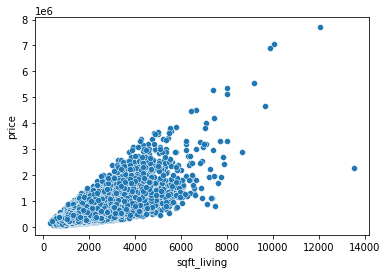

In [97]:
sns.scatterplot(x=house['sqft_living'], y=house['price']) # 회귀분석의 등분산 조건이 깨짐

In [154]:
from statsmodels.formula.api import ols

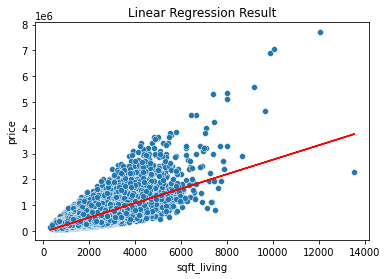

In [99]:
# 변수 할당 
y = house['price']
x = house[['sqft_living']]

# 단순선형회귀모형 적합
lr = ols('price ~ sqft_living', data=house).fit()
y_pred = lr.predict(x)

# 시각화 
sns.scatterplot(x=house['sqft_living'], y=house['price'])
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

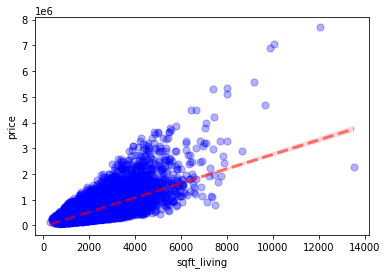

In [100]:
sns.regplot(x=house['sqft_living'], y=house['price'], scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r", line_kws={"lw":3, "ls":"--","alpha":0.5}) # regplot으로 한줄 실행

[결과해석]
- (1) 데이터가 모형 가정을 만족시키는가? <br>
sqrt_living 변수의 값이 커질수록 잔차의 범위가 넓어지고 있어 등분산성 가정에 위배된다.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

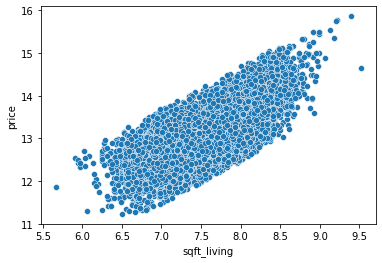

In [101]:
### 데이터를 변형해보자
sns.scatterplot(x=np.log(house['sqft_living']), y=np.log(house['price']))

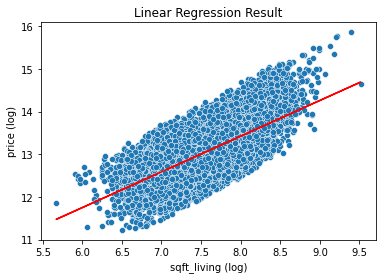

In [102]:
# 변수 할당 
house['log_price'] = np.log(house['price'])
house['log_sqft_living'] = np.log(house[['sqft_living']])

y = house['log_price']
x = house['log_sqft_living']

# 단순선형회귀모형 적합
lr = ols('log_price ~ log_sqft_living', data=house).fit()
y_pred = lr.predict(x)

# 시각화 
sns.scatterplot(x=house['log_sqft_living'], y=house['log_price'])
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('sqft_living (log)', fontsize=10)
plt.ylabel('price (log)',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

<AxesSubplot:xlabel='log_sqft_living', ylabel='log_price'>

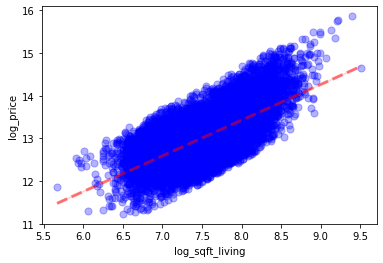

In [103]:
sns.regplot(x=house['log_sqft_living'], y=house['log_price'], scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r", line_kws={"lw":3, "ls":"--","alpha":0.5}) # regplot으로 한줄 실행

In [104]:
lr.summary() # 성능 차이는 별로 안나는듯? 다른 변수가 필요해 보임.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:29:38   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7299      0.047    143.001      0.000       6.638       6.822
log_sqft_living     0.8368      0.006    134.459      0.000       0.825       0.849
==============================================================================
Omnibus:                      123.344   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.759
Skew:                           0.142   Prob(JB):                     1.98e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[결과해석] <br>
- (2) 회귀 모형이 통계적으로 유의한가?  <br>
F 검정의 p-value는 0.00으로, 유의수준 (0.05) 하에서 이 통계모델은 유의하다.
- (3) 모형은 데이터를 얼마나 설명할 수 있는가?  <br>
R-square 값은 0.456으로 데이터의 약 50%를 설명하고 있다.
- (4) 모형 내 회귀계수는 유의한가?  <br>
sqrt_living 변수의 T-test 결과는 p-value 0.000으로 유의한 변수이다.
- (5) 모형이 데이터를 잘 적합하고 있는가? <br>
단순 회귀분석으로는 충분히 데이터를 설명할 수 없어 보인다. 변수 추가를 고려해봐야 한다.

In [150]:
### 맥주 데이터
beer = pd.read_csv("./stats_for_python/5-1-1-beer.csv")
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


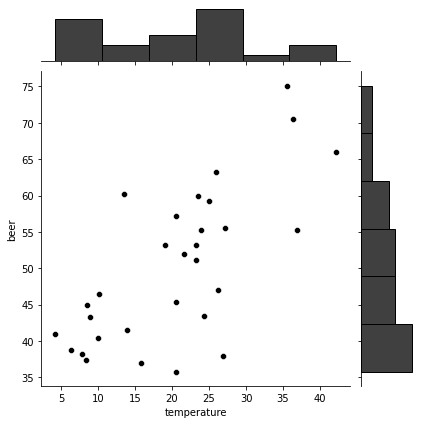

In [152]:
# 변수 확인
sns.jointplot(x="temperature", y="beer", data=beer, color='black')
plt.show()

In [156]:
# Model 생성
lm_model = ols(formula = "beer ~ temperature", data = beer).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.11e-05
Time:                        22:43:08   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
# ANOVA on regression
sm.stats.anova_lm(lm_model, typ=2)

,sum_sq,df,F,PR(>F)
temperature,1651.532489,1.0,28.446984,0.000011
Residual,1625.582178,28.0,NaN,NaN


In [157]:
### 모델 선택: 단순 회귀에서는 Null 모델과 비교
# NULL 모델
null_model = smf.ols("beer ~ 1", data = beer).fit()
null_model.aic

227.94194972563105

In [158]:
# 모델의 aic
lm_model.aic

208.90902935575437

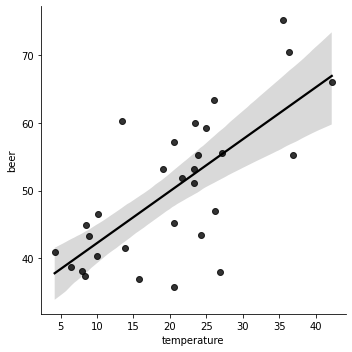

In [160]:
# 회귀직선 확인
sns.lmplot(x="temperature", y="beer", data=beer, scatter_kws={"color": "black"}, line_kws={"color": "black"})
plt.show()

In [161]:
### Prediction
lm_model.predict()

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [162]:
# 특정 기온에 따른 매상 예측
lm_model.predict(pd.DataFrame({"temperature": [0]})) # Intercept와 일치

0    34.610215
dtype: float64

In [163]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [164]:
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

In [165]:
# Residuals
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

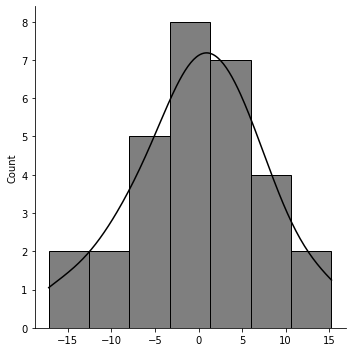

In [170]:
sns.displot(resid, color='black', kde=True)

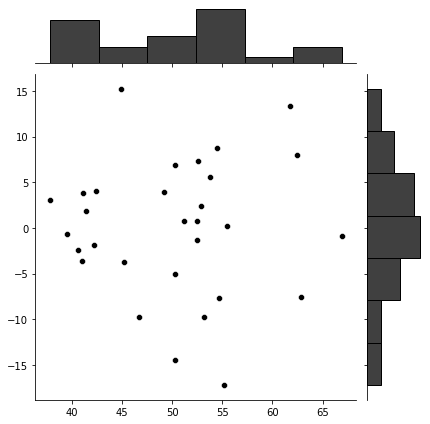

In [172]:
sns.jointplot(x=lm_model.fittedvalues, y=resid, joint_kws={"color": "black"}, marginal_kws={"color": "black"})

In [166]:
# R-square
lm_model.rsquared

0.5039593230611858

In [167]:
# Adj R-square
lm_model.rsquared_adj

0.48624358459908534

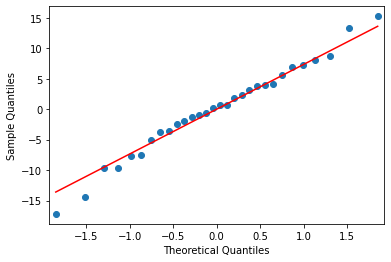

In [173]:
# Q-Q plot
fig = sm.qqplot(resid, line="s")

In [105]:
### Chick diet dataset
chick = pd.read_csv('./r_csv/datasets/ChickWeight.csv')
chick = chick.drop('Unnamed: 0', axis=1)
chick.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [106]:
diet_1 = chick[chick.Diet==1]

In [107]:
chick_1 = diet_1[diet_1.Chick==1]
chick_1

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1
5,93,10,1,1
6,106,12,1,1
7,125,14,1,1
8,149,16,1,1
9,171,18,1,1


In [108]:
x = chick_1['Time']
y = chick_1['weight']

<AxesSubplot:xlabel='Time', ylabel='weight'>

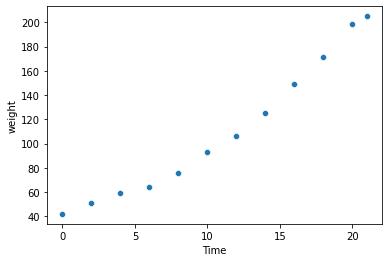

In [109]:
sns.scatterplot(x=x, y=y) # 사실은 시계열분석을 해야되는거 아닌가..

In [110]:
lr = ols('weight ~ Time', data=chick_1).fit()
y_pred = lr.predict(x)

In [111]:
lr.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     232.7
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           2.97e-08
Time:                        23:29:38   Log-Likelihood:                -46.039
No. Observations:                  12   AIC:                             96.08
Df Residuals:                      10   BIC:                             97.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4654      6.728      3.636      0.005       9.475      39.456
Time           7.9879      0.524     15.255      0.000       6.821       9.155
==============================================================================
Omnibus:                        3.840   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                1.217
Skew:                           0.211   Prob(JB):                        0.544
Kurtosis:                       1.498   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

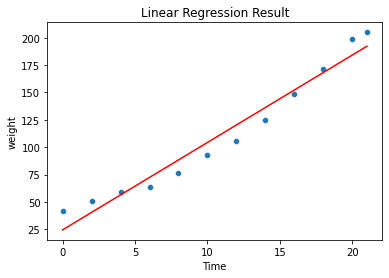

In [112]:
sns.scatterplot(x=x, y=y)
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('Time', fontsize=10)
plt.ylabel('weight',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

<AxesSubplot:xlabel='Time', ylabel='weight'>

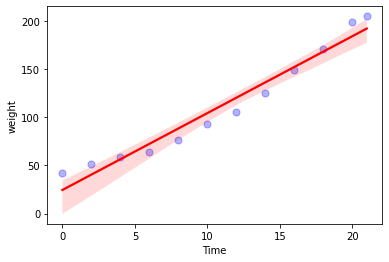

In [113]:
sns.regplot(x=x, y=y, scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r") # regplot으로 한줄 실행

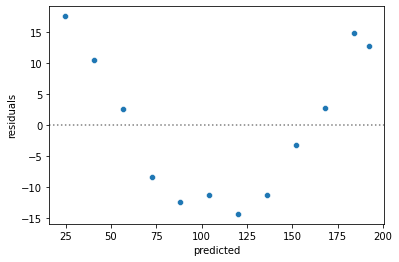

In [114]:
### Manual residual plot
# create a DataFrame of predicted values and residuals
plot_df = pd.DataFrame()
plot_df["predicted"] = y_pred
plot_df["residuals"] = lr.resid

sns.scatterplot(data=plot_df, x="predicted", y="residuals")
plt.axhline(y=0, color='gray', linestyle='dotted')

eval_env: 1


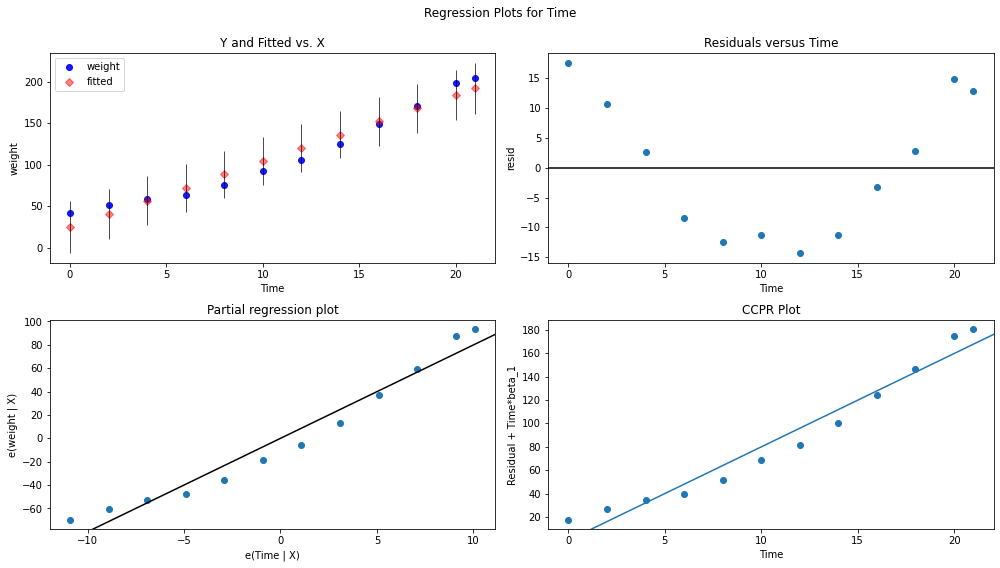

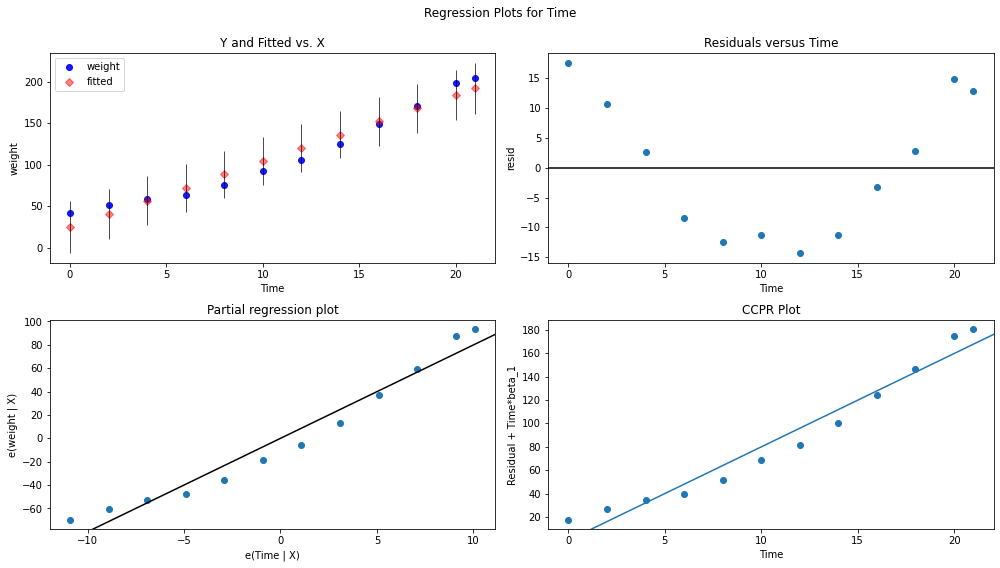

In [115]:
### Residual plot
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(lr, 'Time', fig=fig)

### (2) Multiple Regression
- 독립변수 개수가 여러 개인 경우
- 독립변수 개수가 늘면 R-square 값은 항상 증가하므로, Adjusted R-square (변수 개수 고려)로 설명력 측정
- 다중공선성 확인
    - VIF 10 이상
    - 독립변수 간 상관계수 0.9 이상
    - 독립변수 간 회귀분석의 허용오차(1-Rsquare) 0.1 이하
- 오차항의 독립성
    - 더빈 왓슨 통계랑: 0~4의 값을 가지며, 0이면 양의 상관, 4면 음의 상관. 2=상관 없음
- 독립변수 선택: 최적의 회귀식 도출
    - 모든 가능한 조합
    - 단계적 변수선택: Forward, Backward, Stepwise
    - AIC, BIC, F-statistic 등이 기준이 됨

In [181]:
### Sales data
sales = pd.read_csv("./stats_for_python/5-3-1-lm-model.csv")
sales.head(3)

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy


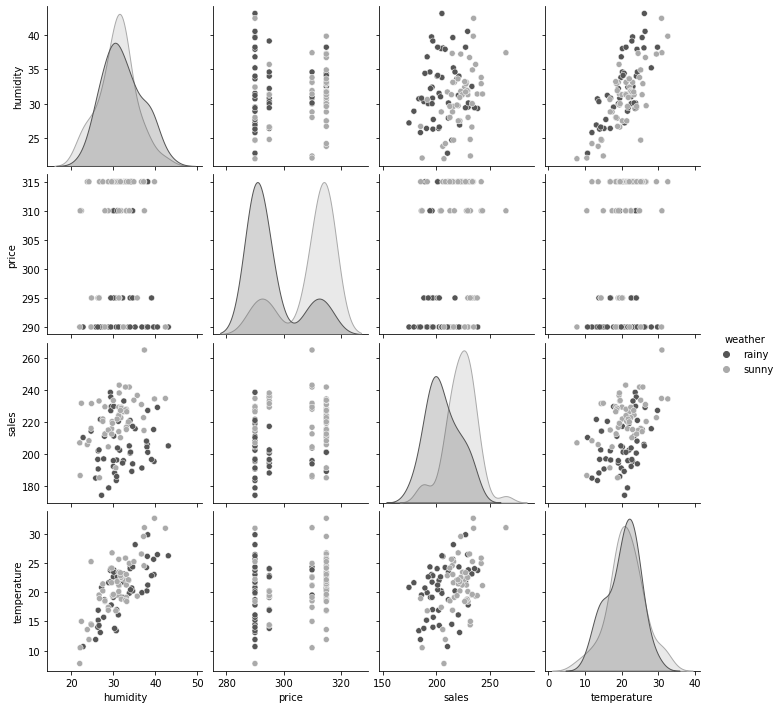

In [182]:
sns.pairplot(data=sales, hue="weather", palette="gray")
plt.show()

In [184]:
# 날씨 별 평균
sales.groupby("weather").mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


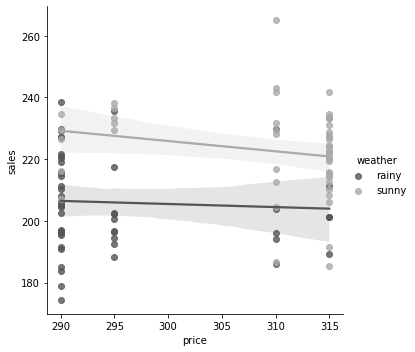

In [186]:
# 날씨 별 매상과 상품 가격
sns.lmplot(x="price", y="sales", data=sales, hue="weather", palette='gray')
plt.show()

In [187]:
# Multiple X
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price", data=sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [188]:
# Regression 계수 검정 (T-test) -> Type 2 ANOVA
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [189]:
# Null Model에서 시작하여 변수 선택
mod_null = smf.ols("sales ~ 1", sales).fit()
resid_sq_null = np.sum(mod_null.resid ** 2)
resid_sq_null

28968.525899999993

In [190]:
# 날씨가 들어간 모델
mod_1 = smf.ols("sales ~ weather", sales).fit()
sm.stats.anova_lm(mod_1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,31.527,0.0
Residual,98.0,21917.565,223.649,NaN,NaN


In [191]:
# 날씨 + 습도 모델
mod_2 = smf.ols("sales ~ weather + humidity", sales).fit()
sm.stats.anova_lm(mod_2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,33.963,0.000
humidity,1.0,1779.601,1779.601,8.572,0.004
Residual,97.0,20137.964,207.608,NaN,NaN


In [192]:
# 날씨 + 기온 모델
mod_2_2 = smf.ols("sales ~ weather + temperature", sales).fit()
sm.stats.anova_lm(mod_2_2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,37.781,0.0
temperature,1.0,3814.779,3814.779,20.441,0.0
Residual,97.0,18102.786,186.627,NaN,NaN


In [ ]:
# 날씨 + 기온 + 습도 모델
# 습도의 효과가 높지 않음 (유의하지 않음)
mod_3_2 = smf.ols("sales ~ weather + temperature + humidity", sales).fit()
sm.stats.anova_lm(mod_3_2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,37.478,0.000
temperature,1.0,3814.779,3814.779,20.277,0.000
humidity,1.0,41.667,41.667,0.221,0.639
Residual,96.0,18061.119,188.137,NaN,NaN


In [194]:
# 전체 변수 모델
mod_full = smf.ols("sales ~ weather + humidity + temperature + price", sales).fit()
sm.stats.anova_lm(mod_full, typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,5845.878,1.0,32.208,0.000
humidity,56.425,1.0,0.311,0.578
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
Residual,17242.717,95.0,NaN,NaN


In [195]:
# 습도 제외 모델
mod_non_humi = smf.ols("sales ~ weather + temperature + price", sales).fit()
sm.stats.anova_lm(mod_non_humi, typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6354.966,1.0,35.266,0.000
temperature,4254.736,1.0,23.611,0.000
price,803.644,1.0,4.460,0.037
Residual,17299.142,96.0,NaN,NaN


In [196]:
# 2개 모델 비교
mod_full.compare_f_test(mod_non_humi)

(0.31087803756963617, 0.578453342712073, 1.0)

In [197]:
# AIC 비교
print("Full:", mod_full.aic.round(3))
print("습도 제외:", mod_non_humi.aic.round(3))

Full: 808.785
습도 제외: 807.112


In [ ]:
from scipy.stats import linregress

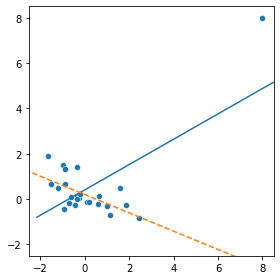

In [114]:
### Outlier 영향 - sample
np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(plt.xlim())
    return (x_vals, intercept + slope * x_vals)

fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x=x, y=y)
slope, intercept, _, _, _ = linregress(x, y)
plt.plot(*abline(slope, intercept))
slope, intercept, _, _, _ = linregress(x[1:], y[1:])
plt.plot(*abline(slope, intercept), '--')
plt.xlim(-2.5, 8.5)
plt.ylim(-2.5, 8.5)

plt.tight_layout()
plt.show()

In [118]:
house = pd.read_csv('./Practical_Statictics/data/house_sales.csv', sep='\t')
house_98105 = house.loc[house['ZipCode'] == 98105, ]

In [119]:
### Regression 진단
house_outlier = smf.ols('AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_98105 = house_outlier.fit()
result_98105.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          1.69e-103
Time:                        21:14:21   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.725e+05   9.83e+04     -7.861      0.000   -9.66e+05   -5.79e+05
SqFtTotLiving   209.6023     24.408      8.587      0.000     161.574     257.631
SqFtLot          38.9333      5.330      7.305      0.000      28.445      49.421
Bathrooms      2282.2641      2e+04      0.114      0.909    -3.7e+04    4.16e+04
Bedrooms      -2.632e+04   1.29e+04     -2.043      0.042   -5.17e+04    -973.867
BldgGrade        1.3e+05   1.52e+04      8.533      0.000       1e+05     1.6e+05
==============================================================================
Omnibus:                       82.127   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.561
Skew:                           0.859   Prob(JB):                    4.26e-128
Kurtosis:                       9.483   Cond. No.                     5.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [120]:
### 잔차 분석
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal

print(sresiduals.idxmin(), sresiduals.min())

24333 -4.326731804078571


In [121]:
result_98105.resid.loc[sresiduals.idxmin()]

-757753.6192115842

In [124]:
### Outlier 확인
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome], '\n')
print(outlier[predictors])

AdjSalePrice 119748.0 

SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


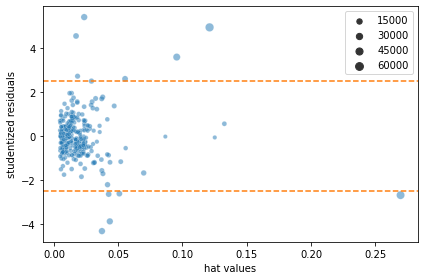

In [125]:
### Cook's distance
influence = OLSInfluence(result_98105)
sns.scatterplot(x=influence.hat_matrix_diag, y=influence.resid_studentized_internal, 
           size=100000 * np.sqrt(influence.cooks_distance[0]), alpha=0.5)

plt.axhline(-2.5, linestyle='--', color='C1')
plt.axhline(2.5, linestyle='--', color='C1')
plt.xlabel('hat values')
plt.ylabel('studentized residuals')

plt.tight_layout()
plt.show()

In [126]:
### 쿡 거리가 0.08 이상인 것 제외
mask = [dist < .08 for dist in influence.cooks_distance[0]]
house_infl = house_98105.loc[mask]

ols_infl = smf.ols('AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_infl)
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

,Original,Influential removed
Intercept,-772549.862447,-647137.096716
SqFtTotLiving,209.602346,230.052569
SqFtLot,38.933315,33.141600
Bathrooms,2282.264145,-16131.879785
Bedrooms,-26320.268796,-22887.865318
BldgGrade,130000.099737,114870.559737


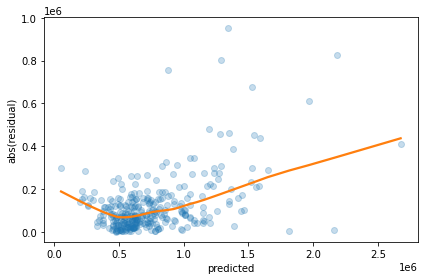

In [128]:
### 이분산 오차 확인
sns.regplot(x=result_98105.fittedvalues, y=np.abs(result_98105.resid), 
            scatter_kws={'alpha': 0.25},
            line_kws={'color': 'C1'},
            lowess=True)
plt.xlabel('predicted')
plt.ylabel('abs(residual)')
plt.tight_layout()
plt.show()

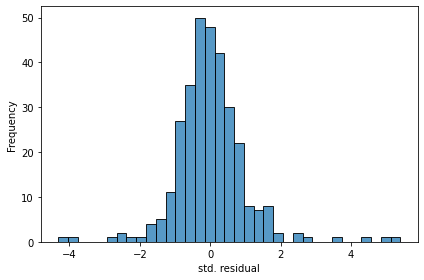

In [129]:
sns.histplot(x=pd.Series(influence.resid_studentized_internal))
plt.xlabel('std. residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

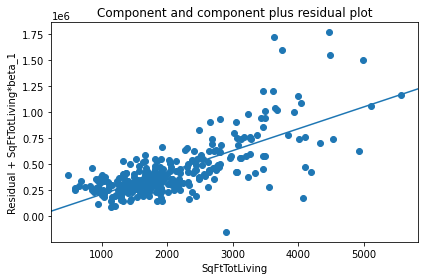

In [130]:
### Partial Residual plots
# partial residual = residual + biXi
# 예측값과 잔차 결합
# 비선형 회귀 고려
sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving')

plt.tight_layout()
plt.show()

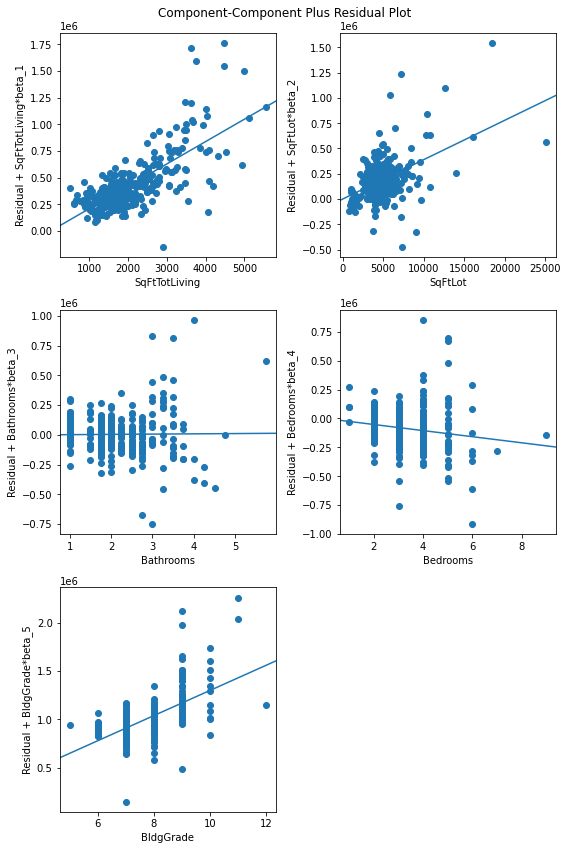

In [131]:
fig = plt.figure(figsize=(8, 12))
fig = sm.graphics.plot_ccpr_grid(result_98105, fig=fig)

In [126]:
### Dummy data
df = pd.DataFrame({'X1': [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
                   'X2': [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
                   'X3': [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
                   'X4': [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12],
                   'Y': [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]})
df

,X1,X2,X3,X4,Y
0,7,26,6,60,78.5
1,1,29,15,52,74.3
2,11,56,8,20,104.3
3,11,31,8,47,87.6
4,7,52,6,33,95.9
5,11,55,9,22,109.2
6,3,71,17,6,102.7
7,1,31,22,44,72.5
8,2,54,18,22,93.1
9,21,47,4,26,115.9


In [127]:
### 변수 간 상관성 확인
df.corr()

,X1,X2,X3,X4,Y
X1,1.000000,0.228579,-0.824134,-0.245445,0.730717
X2,0.228579,1.000000,-0.139242,-0.972955,0.816253
X3,-0.824134,-0.139242,1.000000,0.029537,-0.534671
X4,-0.245445,-0.972955,0.029537,1.000000,-0.821305
Y,0.730717,0.816253,-0.534671,-0.821305,1.000000


In [128]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
### VIF 계산
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("Y ~ X1 + X2 + X3 + X4", data=df, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,38.496211,X1
1,254.423166,X2
2,46.868386,X3
3,282.512865,X4


In [130]:
### VIF 10 이상인 변수를 지우는 함수
def apply_vif(data, target_col):
    vif_df = pd.DataFrame()
    x_columns = list(data.columns.difference([target_col]))
    for j in range(len(x_columns)):
        x_str = ''
        for i, column in enumerate(x_columns):
            if i == len(x_columns) -1:
                x_str += column
            else:
                x_str += column + ' + '
    
        y, x = dmatrices(f"{target_col} ~ {x_str}", data=data, return_type="dataframe")
    
        vif_list = []
        for i in range(1, len(x.columns)): 
            vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
        vif_df = pd.DataFrame(vif_list, columns=['vif', 'variable'])
        
        if vif_df['vif'].max() > 10:
            del_column = vif_df['variable'][vif_df['vif']==vif_df['vif'].max()].values[0]
            x_columns.remove(del_column)
        else:
            break
    
    return y, x, vif_df

In [131]:
y, x, vif_df = apply_vif(df, 'Y')
vif_df

,vif,variable
0,3.251068,X1
1,1.063575,X2
2,3.142125,X3


In [132]:
### Model fit
model = ols(formula="Y ~ X1 + X2 + X3", data=df)
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.37e-08
Time:                        23:29:42   Log-Likelihood:                -26.952
No. Observations:                  13   AIC:                             61.90
Df Residuals:                       9   BIC:                             64.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.1936      3.913     12.315      0.000      39.341      57.046
X1             1.6959      0.205      8.290      0.000       1.233       2.159
X2             0.6569      0.044     14.851      0.000       0.557       0.757
X3             0.2500      0.185      1.354      0.209      -0.168       0.668
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.261
Skew:                           0.208   Prob(JB):                        0.878
Kurtosis:                       2.445   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
### 모델 선택 함수
import time
import itertools
import statsmodels.api as sm

def process_subset(x, y, feature_set):
    model = sm.OLS(y, x[list(feature_set)]) # Modeling
    regr = model.fit() # 모델 학습
    criteria = regr.aic # 모델의 AIC 이 부분을 변경하면 기준을 바꿀 수 있음
    # regr.bic
    # regr.rsquared_adj
    
    return {"model": regr, "criteria": criteria}
        
# 전진선택법
def forward(x, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in x.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(process_subset(x=x, y=y, feature_set=predictors + [p] + ['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택. 기준에 따라 변경 필요
    best_model = models.loc[models['criteria'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors) + 1, "predictors in")
    print('Selected predictors:', best_model['model'].model.exog_names,' Criteria: ', best_model[0])
    
    return best_model

# 후진소거법
def backward(x, y, predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(process_subset(x=x, y=y, feature_set=list(combo) + ['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택. 기준에 따라 변경 필요
    best_model = models.loc[models['criteria'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names, 'Criteria: ',best_model[0] )

    return best_model

# 단계적 선택법
def stepwise_model(x, y):
    stepmodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = []
    s_model_before = process_subset(x, y, predictors + ['Intercept'])['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) +1):
        forward_result = forward(x=x, y=y, predictors=predictors) 
        print('forward')
        stepmodels.loc[i] = forward_result
        predictors = stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        backward_result = backward(x=x, y=y, predictors=predictors)

        if backward_result['criteria'] < forward_result['criteria']:
            stepmodels.loc[i] = backward_result
            predictors = stepmodels.loc[i]["model"].model.exog_names
            s_model_before = stepmodels.loc[i]["criteria"]
            predictors = [k for k in predictors if k !='Intercept']
            print('backward')
            
        print("Criteria: ", stepmodels.loc[i]['criteria'])
        if stepmodels.loc[i]['criteria'] > s_model_before: # 기준에 따라 멈춤 기준 변경 필요
            break
        else:
            s_model_before = stepmodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (stepmodels['model'][len(stepmodels['model'])])

In [134]:
### 전진선택법 구현
def forward_model(x, y):
    formodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = []
    model_result_before = process_subset(x, y, predictors + ['Intercept'])
    s_model_before = model_result_before['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) + 1):
        forward_result = forward(x=x, y=y, predictors=predictors) 
        print('forward')
        formodels.loc[i] = forward_result
        predictors = formodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        print("Criteria: ", formodels.loc[i]['criteria'])
        if formodels.loc[i]['criteria'] > s_model_before:
            break
        else:
            s_model_before = formodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    if len(predictors)==len(x.columns.difference(['Intercept'])):
        return (formodels['model'][len(formodels['model'])])
    elif len(predictors)==1:
        return model_result_before['model']
    else:
        return (formodels['model'][len(formodels['model'])-1])

### 후진선택법 구현
def backward_model(x, y):
    backmodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = list(x.columns.difference(['Intercept']))
    model_result_before = process_subset(x, y, predictors)
    s_model_before = model_result_before['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) + 1):
        backward_result = backward(x=x, y=y, predictors=predictors) 
        print('backward')
        backmodels.loc[i] = backward_result
        predictors = backmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        print("Criteria: ", backmodels.loc[i]['criteria'])
        if backmodels.loc[i]['criteria'] > s_model_before:
            break
        else:
            s_model_before = backmodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    if len(predictors)==0:
        return (backmodels['model'][len(backmodels['model'])])
    elif len(predictors)==len(x.columns.difference(['Intercept']))-1:
        return model_result_before['model']
    else:
        return (backmodels['model'][len(backmodels['model'])-1])


In [135]:
forward_model(x, y).summary()

Criteria, Before selection: 108.33682749906006
Processed  3 models on 1 predictors in
Selected predictors: ['X2', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe558a653d0>
forward
Criteria:  96.0703964203777
Processed  2 models on 2 predictors in
Selected predictors: ['X2', 'X1', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe558a65520>
forward
Criteria:  62.3123927621906
Processed  1 models on 3 predictors in
Selected predictors: ['X2', 'X1', 'X3', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe558a65190>
forward
Criteria:  61.9035968705951
Total elapsed time: 0.01989293098449707 seconds.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.37e-08
Time:                        23:29:42   Log-Likelihood:                -26.952
No. Observations:                  13   AIC:                             61.90
Df Residuals:                       9   BIC:                             64.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X2             0.6569      0.044     14.851      0.000       0.557       0.757
X1             1.6959      0.205      8.290      0.000       1.233       2.159
X3             0.2500      0.185      1.354      0.209      -0.168       0.668
Intercept     48.1936      3.913     12.315      0.000      39.341      57.046
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.261
Skew:                           0.208   Prob(JB):                        0.878
Kurtosis:                       2.445   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
stepwise_model(x, y).summary()

Criteria, Before selection: 108.33682749906006
Processed  3 models on 1 predictors in
Selected predictors: ['X2', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe558a77400>
forward
Processed  1 models on 0 predictors in 0.0017750263214111328
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe558a77880>
Criteria:  96.0703964203777
Processed  2 models on 2 predictors in
Selected predictors: ['X2', 'X1', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe558a77910>
forward
Processed  2 models on 1 predictors in 0.0027990341186523438
Selected predictors: ['X2', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe558a77970>
Criteria:  62.3123927621906
Processed  1 models on 3 predictors in
Selected predictors: ['X2', 'X1', 'X3', 'Intercept']  Criteria:  <statsmodels.re

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.37e-08
Time:                        23:29:42   Log-Likelihood:                -26.952
No. Observations:                  13   AIC:                             61.90
Df Residuals:                       9   BIC:                             64.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X2             0.6569      0.044     14.851      0.000       0.557       0.757
X1             1.6959      0.205      8.290      0.000       1.233       2.159
X3             0.2500      0.185      1.354      0.209      -0.168       0.668
Intercept     48.1936      3.913     12.315      0.000      39.341      57.046
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.261
Skew:                           0.208   Prob(JB):                        0.878
Kurtosis:                       2.445   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
### hills data
hills = pd.read_csv('./r_csv/MASS/hills.csv', index_col='Unnamed: 0')
hills.head()

,dist,climb,time
Greenmantle,2.5,650,16.083
Carnethy,6.0,2500,48.350
Craig Dunain,6.0,900,33.650
Ben Rha,7.5,800,45.600
Ben Lomond,8.0,3070,62.267


In [138]:
### VIF 계산
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("time ~ dist + climb", data=hills, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,1.740812,dist
1,1.740812,climb


In [139]:
### Forward selection
forward_model(x, y).summary()

Criteria, Before selection: 374.2097234346728
Processed  2 models on 1 predictors in
Selected predictors: ['dist', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe558a7f910>
forward
Criteria:  310.81236070267767
Processed  1 models on 2 predictors in
Selected predictors: ['dist', 'climb', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe578b2b700>
forward
Criteria:  290.22192241420146
Total elapsed time: 0.01310420036315918 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.40e-18
Time:                        23:29:42   Log-Likelihood:                -142.11
No. Observations:                  35   AIC:                             290.2
Df Residuals:                      32   BIC:                             294.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dist           6.2180      0.601     10.343      0.000       4.993       7.442
climb          0.0110      0.002      5.387      0.000       0.007       0.015
Intercept     -8.9920      4.303     -2.090      0.045     -17.756      -0.228
==============================================================================
Omnibus:                       47.910   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.976
Skew:                           3.026   Prob(JB):                     1.56e-51
Kurtosis:                      14.127   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
### Premax data
premax = pd.DataFrame({"나이": [7, 7, 8, 8, 8, 9, 11, 12, 12, 13, 13, 14, 14, 15, 16, 17, 17, 17, 17, 19, 19, 20, 23, 23, 23],
                       "키": [109, 112, 124, 125, 127, 130, 139, 150, 146, 155, 156, 153, 160, 158, 160, 153, 174, 176, 171, 156, 174, 178, 180, 175, 179],
                       "체중": [13.1, 12.9, 14.1, 16.2, 21.5, 17.5, 30.7, 28.4, 25.1, 31.5, 39.9, 42.1, 45.6, 51.2, 35.9, 34.8, 44.7, 60.1, 42.6, 37.2, 54.6, 64, 73.8, 51.1, 71.5],
                       "BMP": [68, 65, 64, 67, 93, 68, 89, 69, 67, 68, 89, 90, 93, 93, 66, 70, 70, 92, 69, 72, 86, 86, 97, 71, 95], 
                       "FEV": [32, 19, 22, 41, 52, 44, 28, 18, 24, 23, 39, 26, 45, 45, 31, 29, 49, 29, 38, 21, 37, 34, 57, 33, 52], 
                       "RV": [258, 449, 441, 234, 202, 308, 305, 369, 312, 413, 206, 253, 174, 158, 302, 204, 187, 188, 172, 216, 184, 225, 171, 224, 225],
                       "FRC": [183, 245, 268, 146, 131, 155, 179, 198, 194, 225, 142, 191, 139, 124, 133, 118, 104, 129, 130, 119, 118, 148, 108, 131, 127], 
                       "TLC": [137, 134, 147, 124, 104, 118, 119, 103, 128, 136, 95, 121, 108, 90, 101, 120, 103, 130, 103, 81, 101, 135, 98, 113, 101],
                       "Premax": [95, 85, 100, 85, 95, 80, 65, 110, 70, 95, 110, 90, 100, 80, 134, 134, 165, 120, 130, 85, 85, 160, 165, 95, 195]})
premax.head()

,나이,키,체중,BMP,FEV,RV,FRC,TLC,Premax
0,7,109,13.1,68,32,258,183,137,95
1,7,112,12.9,65,19,449,245,134,85
2,8,124,14.1,64,22,441,268,147,100
3,8,125,16.2,67,41,234,146,124,85
4,8,127,21.5,93,52,202,131,104,95


In [141]:
### VIF 계산
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("Premax ~ 나이 + 키 + 체중 + BMP + FEV + RV + FRC + TLC", data=premax, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,18.868867,나이
1,13.181053,키
2,42.723481,체중
3,7.114754,BMP
4,2.720191,FEV
5,8.834720,RV
6,12.770155,FRC
7,2.588500,TLC


In [142]:
y, x, vif_df = apply_vif(premax, 'Premax')
vif_df

,vif,variable
0,1.718029,BMP
1,1.997898,FEV
2,2.835665,RV
3,1.626538,TLC
4,7.314046,나이
5,7.590237,키


In [143]:
### Forward selection
forward_model(x, y).summary()

Criteria, Before selection: 247.40938943591382
Processed  6 models on 1 predictors in
Selected predictors: ['나이', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7b7f10>
forward
Criteria:  237.6052195128863
Processed  5 models on 2 predictors in
Selected predictors: ['나이', 'FEV', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe558a85670>
forward
Criteria:  236.10701068248488
Processed  4 models on 3 predictors in
Selected predictors: ['나이', 'FEV', 'RV', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7c5c10>
forward
Criteria:  234.55083519747006
Processed  3 models on 4 predictors in
Selected predictors: ['나이', 'FEV', 'RV', 'TLC', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7b7c40>
forward
Criteria:  235.04343582285284
Total elapsed time: 0.036971092224121094 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Premax   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.883
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00104
Time:                        23:29:42   Log-Likelihood:                -113.28
No. Observations:                  25   AIC:                             234.6
Df Residuals:                      21   BIC:                             239.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
나이             4.5416      1.194      3.802      0.001       2.058       7.026
FEV            1.5742      0.603      2.610      0.016       0.320       2.829
RV             0.1612      0.090      1.792      0.088      -0.026       0.348
Intercept    -52.4425     48.764     -1.075      0.294    -153.853      48.968
==============================================================================
Omnibus:                        2.467   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.397
Skew:                          -0.268   Prob(JB):                        0.497
Kurtosis:                       1.974   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
### Backward selection
backward_model(x, y).summary()

Criteria, Before selection: 237.6394499557527
Processed  6 models on 5 predictors in 0.007906198501586914
Selected predictors: ['BMP', 'FEV', 'RV', 'TLC', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7b6160>
backward
Criteria:  236.46947223411826
Processed  5 models on 4 predictors in 0.0063130855560302734
Selected predictors: ['FEV', 'RV', 'TLC', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7d4040>
backward
Criteria:  235.04343582285287
Processed  4 models on 3 predictors in 0.005641937255859375
Selected predictors: ['FEV', 'RV', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7d4b80>
backward
Criteria:  234.55083519747006
Processed  3 models on 2 predictors in 0.003832101821899414
Selected predictors: ['FEV', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWra

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Premax   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.883
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00104
Time:                        23:29:42   Log-Likelihood:                -113.28
No. Observations:                  25   AIC:                             234.6
Df Residuals:                      21   BIC:                             239.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FEV            1.5742      0.603      2.610      0.016       0.320       2.829
RV             0.1612      0.090      1.792      0.088      -0.026       0.348
나이             4.5416      1.194      3.802      0.001       2.058       7.026
Intercept    -52.4425     48.764     -1.075      0.294    -153.853      48.968
==============================================================================
Omnibus:                        2.467   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.397
Skew:                          -0.268   Prob(JB):                        0.497
Kurtosis:                       1.974   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
### Stepwise selection
stepwise_model(x, y).summary()

Criteria, Before selection: 247.40938943591382
Processed  6 models on 1 predictors in
Selected predictors: ['나이', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7b7400>
forward
Processed  1 models on 0 predictors in 0.0017437934875488281
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7bea60>
Criteria:  237.6052195128863
Processed  5 models on 2 predictors in
Selected predictors: ['나이', 'FEV', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7ed340>
forward
Processed  2 models on 1 predictors in 0.003217935562133789
Selected predictors: ['나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7e5fd0>
Criteria:  236.10701068248488
Processed  4 models on 3 predictors in
Selected predictors: ['나이', 'FEV', 'RV', 'Intercept']  Criteria:  <statsmodel

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Premax   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.883
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00104
Time:                        23:29:42   Log-Likelihood:                -113.28
No. Observations:                  25   AIC:                             234.6
Df Residuals:                      21   BIC:                             239.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
나이             4.5416      1.194      3.802      0.001       2.058       7.026
FEV            1.5742      0.603      2.610      0.016       0.320       2.829
RV             0.1612      0.090      1.792      0.088      -0.026       0.348
Intercept    -52.4425     48.764     -1.075      0.294    -153.853      48.968
==============================================================================
Omnibus:                        2.467   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.397
Skew:                          -0.268   Prob(JB):                        0.497
Kurtosis:                       1.974   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
### Salary data
salary = pd.DataFrame({"salary": [3030, 6050, 3571, 3300, 0, 9375, 9525, 5000, 999, 3300, 3500, 2493, 1911, 2130, 1185, 5236, 1990, 6000, 6229, 1523],
                       "tenure": [7, 0, 11, 6, 18, 6, 15, 5 ,3, 2, 16, 5, 7, 4, 0, 2, 4, 32, 5, 3],
                       "age": [61, 51, 63, 60, 63, 57, 60, 61, 57, 60, 63, 61, 58, 59, 56, 60, 60, 74, 63, 56],
                       "sales": [161315, 144416, 139208, 100697, 100469, 81667, 76431, 57813, 56154, 53588, 50777, 47678, 47061, 41322, 37154, 35853, 33674, 33296, 32379, 31707],
                       "profits": [2956, 22071, 4430, 6370, 9296, 6328, 5807, 5372, 1120, 6398, 5165, 1704, 2945, 1048, 3780, 1259, 568, 3765, 3782, 578],
                       "assets": [257389, 237545, 49271, 92630, 355935, 86100, 668641, 59920, 36672, 59550, 617679, 42754, 33673, 37675, 30966, 299804, 14166, 19166, 194398, 3665875]})

In [147]:
salary.head()

,salary,tenure,age,sales,profits,assets
0,3030,7,61,161315,2956,257389
1,6050,0,51,144416,22071,237545
2,3571,11,63,139208,4430,49271
3,3300,6,60,100697,6370,92630
4,0,18,63,100469,9296,355935


In [148]:
salary.describe()

,salary,tenure,age,sales,profits,assets
count,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,3817.350000,7.550000,60.150000,68132.950000,4737.100000,3.429905e+05
std,2616.147555,7.653517,4.416178,40564.233925,4717.577399,8.053848e+05
min,0.000000,0.000000,51.000000,31707.000000,568.000000,1.416600e+04
25%,1970.250000,3.000000,57.750000,36828.750000,1592.750000,3.742425e+04
50%,3300.000000,5.000000,60.000000,52182.500000,3781.000000,7.301000e+04
75%,5427.000000,8.000000,61.500000,86367.500000,5937.250000,2.679928e+05
max,9525.000000,32.000000,74.000000,161315.000000,22071.000000,3.665875e+06


<AxesSubplot:xlabel='profits', ylabel='salary'>

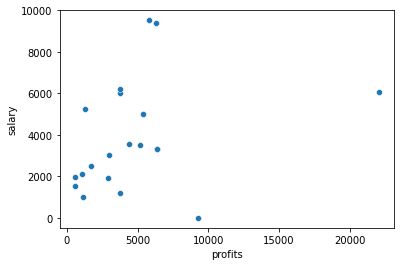

In [149]:
sns.scatterplot(x='profits', y='salary', data=salary)

In [150]:
salary.loc[:, ['profits', 'salary']].corr()

,profits,salary
profits,1.000000,0.301959
salary,0.301959,1.000000


In [151]:
### Simple Model fit
model = ols(formula="salary ~ profits", data=salary)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.806
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.196
Time:                        23:29:43   Log-Likelihood:                -184.30
No. Observations:                  20   AIC:                             372.6
Df Residuals:                      18   BIC:                             374.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3024.1107    822.629      3.676      0.002    1295.832    4752.390
profits        0.1675      0.125      1.344      0.196      -0.094       0.429
==============================================================================
Omnibus:                        3.644   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                2.071
Skew:                           0.770   Prob(JB):                        0.355
Kurtosis:                       3.334   Cond. No.                     9.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
### Multiple Model fit
model = ols(formula="salary ~ age + sales", data=salary)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.2316
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.796
Time:                        23:29:43   Log-Likelihood:                -184.99
No. Observations:                  20   AIC:                             376.0
Df Residuals:                      17   BIC:                             379.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1012.7782   8955.327     -0.113      0.911   -1.99e+04    1.79e+04
age           70.4102    144.228      0.488      0.632    -233.885     374.705
sales          0.0087      0.016      0.556      0.585      -0.024       0.042
==============================================================================
Omnibus:                        3.919   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.458
Skew:                           0.853   Prob(JB):                        0.293
Kurtosis:                       3.191   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
### Multiple Model fit
model = ols(formula="salary ~ profits + age + sales + tenure + assets", data=salary)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                 -0.164
Method:                 Least Squares   F-statistic:                    0.4658
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.795
Time:                        23:29:43   Log-Likelihood:                -183.72
No. Observations:                  20   AIC:                             379.4
Df Residuals:                      14   BIC:                             385.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    629.5358   2.13e+04      0.030      0.977    -4.5e+04    4.62e+04
profits        0.2069      0.199      1.040      0.316      -0.220       0.633
age           38.8728    361.115      0.108      0.916    -735.641     813.387
sales         -0.0063      0.020     -0.324      0.751      -0.048       0.036
tenure        48.8144    189.934      0.257      0.801    -358.553     456.182
assets        -0.0002      0.001     -0.212      0.835      -0.002       0.002
==============================================================================
Omnibus:                        4.237   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                2.144
Skew:                           0.641   Prob(JB):                        0.342
Kurtosis:                       3.965   Cond. No.                     2.89e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
y, x = dmatrices("salary ~ profits + age + sales + tenure + assets", data=salary, return_type="dataframe")

In [155]:
### Backward selection
backward_model(x, y).summary()

Criteria, Before selection: 377.43326978089874
Processed  5 models on 4 predictors in 0.006639242172241211
Selected predictors: ['assets', 'profits', 'sales', 'tenure', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b7b68b0>
backward
Criteria:  377.4485646428145
Total elapsed time: 0.011365890502929688 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              8.341
Date:                Sat, 15 Jul 2023   Prob (F-statistic):                    0.000609
Time:                        23:29:43   Log-Likelihood:                         -183.72
No. Observations:                  20   AIC:                                      377.4
Df Residuals:                      15   BIC:                                      382.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           49.5384     24.511      2.021      0.061      -2.706     101.783
assets        -0.0002      0.001     -0.232      0.820      -0.002       0.001
profits        0.2101      0.162      1.300      0.213      -0.134       0.554
sales         -0.0063      0.019     -0.334      0.743      -0.046       0.034
tenure        43.8730     87.604      0.501      0.624    -142.850     230.597
==============================================================================
Omnibus:                        4.436   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                2.291
Skew:                           0.659   Prob(JB):                        0.318
Kurtosis:                       4.006   Cond. No.                     1.25e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
### Forward selection
forward_model(x, y).summary()

Criteria, Before selection: 372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe5387a5c70>
forward
Criteria:  372.59784786557896
Total elapsed time: 0.010807037353515625 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 15 Jul 2023   Prob (F-statistic):                nan
Time:                        23:29:43   Log-Likelihood:                -185.26
No. Observations:                  20   AIC:                             372.5
Df Residuals:                      19   BIC:                             373.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3817.3500    584.988      6.526      0.000    2592.955    5041.745
==============================================================================
Omnibus:                        3.238   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.186
Skew:                           0.809   Prob(JB):                        0.335
Kurtosis:                       2.945   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
### Stepwise selection
stepwise_model(x, y).summary()

Criteria, Before selection: 372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe5387a5b80>
forward
Processed  1 models on 0 predictors in 0.00177001953125
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe5387a5760>
backward
Criteria:  372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59b878070>
forward
Processed  1 models on 0 predictors in 0.0018486976623535156
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe5387a5e80>
backward
Criteria:  372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmode

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 15 Jul 2023   Prob (F-statistic):                nan
Time:                        23:29:43   Log-Likelihood:                -185.26
No. Observations:                  20   AIC:                             372.5
Df Residuals:                      19   BIC:                             373.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3817.3500    584.988      6.526      0.000    2592.955    5041.745
==============================================================================
Omnibus:                        3.238   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.186
Skew:                           0.809   Prob(JB):                        0.335
Kurtosis:                       2.945   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
### Cars data
# 데이터 불러오기
cars = pd.read_csv('./ADP_book_ver01/data/Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [159]:
# ols 모델의 formula을 정의할 때, 일부 특수문자는 쓸 수 없기에, 컬럼 특수문자 제거 
cars.columns = cars.columns.str.replace(".","")

/var/folders/cb/__k37xkx4s324t8t_p2bgr4w0000gn/T/ipykernel_64032/3861836607.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cars.columns = cars.columns.str.replace(".","")


In [160]:
model = ols(formula="Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway", data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           4.88e-14
Time:                        23:29:43   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
### correlation 확인
cars[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [162]:
### VIF 계산
y, x = dmatrices("Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway", data=cars, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [163]:
### MPGcity 변수 제거
model = ols(formula="Price ~ EngineSize + RPM + Weight + MPGhighway", data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.98
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           2.26e-15
Time:                        23:29:43   Log-Likelihood:                -303.29
No. Observations:                  93   AIC:                             616.6
Df Residuals:                      88   BIC:                             629.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7063     14.846     -2.540      0.013     -67.210      -8.203
EngineSize     4.5884      1.343      3.418      0.001       1.920       7.256
RPM            0.0071      0.001      5.232      0.000       0.004       0.010
Weight         0.0049      0.003      1.690      0.095      -0.001       0.011
MPGhighway    -0.2646      0.221     -1.200      0.234      -0.703       0.174
==============================================================================
Omnibus:                       62.072   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.013
Skew:                           2.047   Prob(JB):                     1.22e-80
Kurtosis:                      11.843   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
y, x, vif_df = apply_vif(cars[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway', 'Price']], "Price")
vif_df

,vif,variable
0,4.471987,EngineSize
1,3.456037,Length
2,3.281779,MPGhighway
3,1.445721,RPM
4,8.597026,Weight


다중공선성 변수(MPGcity) 제거 후 MPGhighway의 유의성이 올라갔음.

In [165]:
### Stepwise selection
stepwise_model(x=x, y=y).summary()

Criteria, Before selection: 686.7529864151061
Processed  5 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe5587b9910>
forward
Processed  1 models on 0 predictors in 0.0017180442810058594
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59bcab2e0>
Criteria:  638.2790669305498
Processed  4 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe5387977c0>
forward
Processed  2 models on 1 predictors in 0.003179788589477539
Selected predictors: ['Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59bc92fa0>
Criteria:  624.5241529342444
Processed  3 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           6.75e-16
Time:                        23:29:44   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
### Backward selection
backward_model(x=x, y=y).summary()

Criteria, Before selection: 621.0794757132378
Processed  5 models on 4 predictors in 0.008105993270874023
Selected predictors: ['EngineSize', 'MPGhighway', 'RPM', 'Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59bca6100>
backward
Criteria:  616.5890684898023
Processed  4 models on 3 predictors in 0.005672931671142578
Selected predictors: ['EngineSize', 'RPM', 'Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59bca61f0>
backward
Criteria:  616.0976497740974
Processed  3 models on 2 predictors in 0.003970146179199219
Selected predictors: ['RPM', 'Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59bcb74c0>
backward
Criteria:  624.5241529342444
Total elapsed time: 0.02854299545288086 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           6.75e-16
Time:                        23:29:44   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
### Forward selection
forward_model(x=x, y=y).summary()

Criteria, Before selection: 686.7529864151061
Processed  5 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe59bcb70d0>
forward
Criteria:  638.2790669305498
Processed  4 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe5587df9d0>
forward
Criteria:  624.5241529342444
Processed  3 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe5587dfc40>
forward
Criteria:  616.0976497740975
Processed  2 models on 4 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'MPGhighway', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe5587dfd60>
forward
Criteria:  616.5890684898023
Total e

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           6.75e-16
Time:                        23:29:44   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[결과해석]
- (1) 모델 설명 <br>
Stepwise selection을 통해 Weight, RPM, EngineSize가 포함된 다중 선형 회귀 모델을 채택하였다. 이 모델은  Adj.R-square 값이 0.547로 전체 데이터의 약 54.7%를 설명한다. <br>
설명력이 높은 모델은 아니므로 추가적인 변수를 찾아 데이터를 보완해야 할 필요성이 있다.
- (2) 회귀식  <br>
y = 0.0073Weight + 0.0071RPM + 4.3054EngineSize - 51.7933
- (3) 회귀계수 설명  <br>
모델의 성능이 좋지 않아 회귀계수의 값이 정확하다고 말할 수는 없지만, 회귀식에서 차량의 가격에 가장 큰 영향을 주는 변수는 EngineSize라고 할 수 있다. <br>
반면 Weight, RPM은 유의한 변수이지만, 회귀계수가 너무 작아 영향력이 거의 없다.

## Robust-linear Regression

### (1) Robust Regression

### (2) Quantile Regression

## Non-linear Regression

### (1) Polymonial Regression

In [116]:
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [5, 3, 2, 3, 4, 6, 10, 12, 18]})
df

,x,y
0,1,5
1,2,3
2,3,2
3,4,3
4,5,4
5,6,6
6,7,10
7,8,12
8,9,18


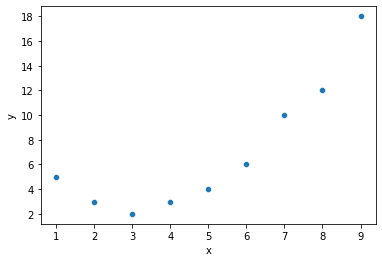

In [117]:
x = df['x']
y = df['y']

sns.scatterplot(x=x, y=y)
plt.show()

In [118]:
model = ols(formula="y ~ x", data=df)
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     16.99
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00445
Time:                        23:29:40   Log-Likelihood:                -21.732
No. Observations:                   9   AIC:                             47.46
Df Residuals:                       7   BIC:                             47.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1667      2.230     -0.523      0.617      -6.439       4.106
x              1.6333      0.396      4.122      0.004       0.696       2.570
==============================================================================
Omnibus:                        1.451   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.008
Skew:                           0.668   Prob(JB):                        0.604
Kurtosis:                       2.051   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

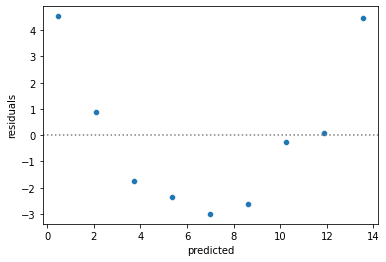

In [119]:
### Manual residual plot
# create a DataFrame of predicted values and residuals
plot_df = pd.DataFrame()
plot_df["predicted"] = result.predict(x)
plot_df["residuals"] = result.resid

sns.scatterplot(data=plot_df, x="predicted", y="residuals") # 2차식이 필요해 보인다.
plt.axhline(y=0, color='gray', linestyle='dotted')

<AxesSubplot:xlabel='x'>

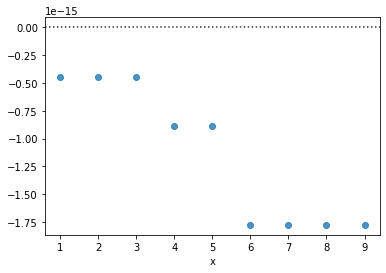

In [120]:
### x값에 따른 residuals
sns.residplot(x=x, y=result.predict(x), data=df)

In [121]:
x_sq = x**2
df['x_sq'] = x_sq

In [122]:
model = ols(formula="y ~ x + x_sq", data=df)
result = model.fit()

y_pred = result.predict(x)
result.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     292.2
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.05e-06
Time:                        23:29:41   Log-Likelihood:                -6.6251
No. Observations:                   9   AIC:                             19.25
Df Residuals:                       6   BIC:                             19.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1667      0.787      9.103      0.000       5.240       9.093
x             -2.9121      0.361     -8.056      0.000      -3.797      -2.028
x_sq           0.4545      0.035     12.893      0.000       0.368       0.541
==============================================================================
Omnibus:                        0.843   Durbin-Watson:                   3.026
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.023
Skew:                          -0.122   Prob(JB):                        0.989
Kurtosis:                       2.962   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

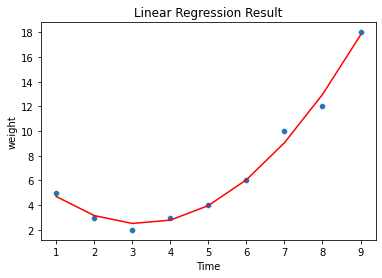

In [123]:
sns.scatterplot(x=x, y=y)
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('Time', fontsize=10)
plt.ylabel('weight',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

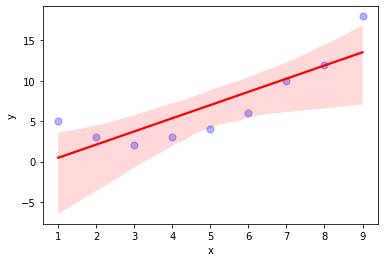

In [124]:
sns.regplot(x=x, y=y, scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r") # regplot으로 한줄 실행

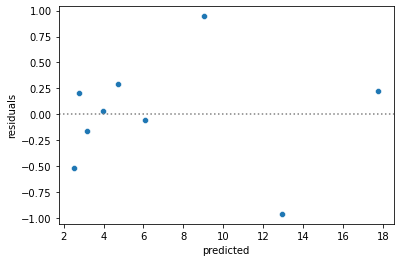

In [125]:
### Manual residual plot
# create a DataFrame of predicted values and residuals
plot_df = pd.DataFrame()
plot_df["predicted"] = result.predict(x)
plot_df["residuals"] = result.resid

sns.scatterplot(data=plot_df, x="predicted", y="residuals")
plt.axhline(y=0, color='gray', linestyle='dotted')

In [132]:
### house data before
# 2차항 추가
model_poly = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving + np.power(SqFtTotLiving, 2) + ' + 
                'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_poly = model_poly.fit()
result_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          9.95e-106
Time:                        21:27:22   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -6.159e+05   1.03e+05     -5.953      0.000   -8.19e+05   -4.12e+05
SqFtTotLiving                  7.4521     55.418      0.134      0.893    -101.597     116.501
np.power(SqFtTotLiving, 2)     0.0388      0.010      4.040      0.000       0.020       0.058
SqFtLot                       32.5594      5.436      5.990      0.000      21.863      43.256
Bathrooms                  -1435.1231   1.95e+04     -0.074      0.941   -3.99e+04     3.7e+04
Bedrooms                   -9191.9441   1.33e+04     -0.693      0.489   -3.53e+04    1.69e+04
BldgGrade                   1.357e+05   1.49e+04      9.087      0.000    1.06e+05    1.65e+05
==============================================================================
Omnibus:                       75.161   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.978
Skew:                           0.699   Prob(JB):                    2.92e-139
Kurtosis:                       9.853   Cond. No.                     7.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

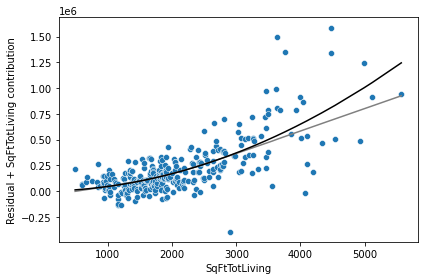

0.038791281682311475


In [133]:
def partialResidualPlot(model, df, outcome, feature):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    sns.scatterplot(x=results.feature, y = results.ypartial + results.residual)
    sns.lineplot(x=smoothed[:, 0], y=smoothed[:, 1], color='gray') # spline line
    sns.lineplot(x=results.feature, y=results.ypartial, color='black')
    plt.xlabel(feature)
    plt.ylabel(f'Residual + {feature} contribution')

partialResidualPlot(result_poly, house_98105, 'AdjSalePrice', 'SqFtTotLiving')

plt.tight_layout()
plt.show()
print(result_poly.params[2])

### (2) Spline Regression

In [134]:
### house data - continued
formula = ('AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' + # b-spline addec
           'SqFtLot + Bathrooms + Bedrooms + BldgGrade')
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()
result_spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.8
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          7.10e-104
Time:                        21:52:07   Log-Likelihood:                -4211.4
No. Observations:                 313   AIC:                             8445.
Df Residuals:                     302   BIC:                             8486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -4.142e+05   1.43e+05     -2.899      0.004   -6.95e+05   -1.33e+05
bs(SqFtTotLiving, df=6, degree=3)[0] -1.995e+05   1.86e+05     -1.076      0.283   -5.65e+05    1.66e+05
bs(SqFtTotLiving, df=6, degree=3)[1] -1.206e+05   1.23e+05     -0.983      0.326   -3.62e+05    1.21e+05
bs(SqFtTotLiving, df=6, degree=3)[2] -7.164e+04   1.36e+05     -0.525      0.600    -3.4e+05    1.97e+05
bs(SqFtTotLiving, df=6, degree=3)[3]  1.957e+05   1.62e+05      1.212      0.227   -1.22e+05    5.14e+05
bs(SqFtTotLiving, df=6, degree=3)[4]  8.452e+05   2.18e+05      3.878      0.000    4.16e+05    1.27e+06
bs(SqFtTotLiving, df=6, degree=3)[5]  6.955e+05   2.14e+05      3.255      0.001    2.75e+05    1.12e+06
SqFtLot                                 33.3258      5.454      6.110      0.000      22.592      44.059
Bathrooms                            -4778.2080   1.94e+04     -0.246      0.806    -4.3e+04    3.34e+04
Bedrooms                             -5778.7045   1.32e+04     -0.437      0.663   -3.18e+04    2.03e+04
BldgGrade                             1.345e+05   1.52e+04      8.842      0.000    1.05e+05    1.64e+05
==============================================================================
Omnibus:                       58.816   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.021
Skew:                           0.330   Prob(JB):                    8.51e-136
Kurtosis:                       9.874   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

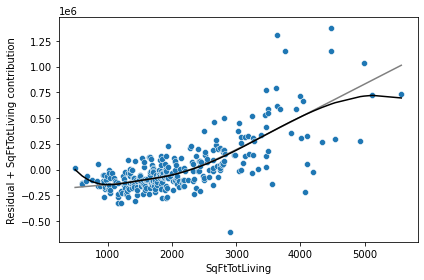

In [135]:
partialResidualPlot(result_spline, house_98105, 'AdjSalePrice', 'SqFtTotLiving')
plt.tight_layout()
plt.show()

In [136]:
from statsmodels.gam.api import GLMGam, BSplines

In [137]:
### Generalized Additive Models
# Spline 회귀를 찾는 데 사용가능
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

x_spline = house_98105[predictors]
bs = BSplines(x_spline, df=[10] + [3] * 4, degree=[3] + [2] * 4)

# penalization weight
alpha = np.array([0] * 5)

formula = ('AdjSalePrice ~ SqFtTotLiving + ' + 
           'SqFtLot + Bathrooms + Bedrooms + BldgGrade')

gam_sm = GLMGam.from_formula(formula, data=house_98105, smoother=bs, alpha=alpha)
res_sm = gam_sm.fit()
print(res_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AdjSalePrice   No. Observations:                  313
Model:                         GLMGam   Df Residuals:                      295
Model Family:                Gaussian   Df Model:                        17.00
Link Function:               identity   Scale:                      2.7471e+10
Method:                         PIRLS   Log-Likelihood:                -4196.6
Date:                Thu, 03 Aug 2023   Deviance:                   8.1039e+12
Time:                        21:54:09   Pearson chi2:                 8.10e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9901
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.481e+05   1.18e+05  

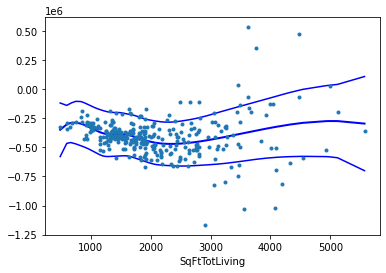

In [138]:
res_sm.plot_partial(0, cpr=True);

### (3) Logistic Regression
- Statistics version

In [230]:
test_result = pd.read_csv("./stats_for_python/6-3-1-logistic-regression.csv")
test_result.head(3)

,hours,result
0,0,0
1,0,0
2,0,0


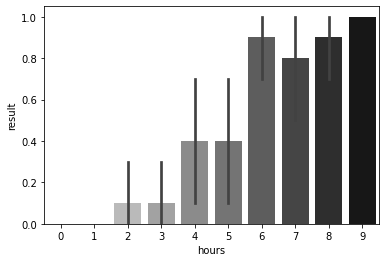

In [232]:
# 공부시간 별 시험 합격률
sns.barplot(x="hours", y="result", data=test_result, palette='gray_r')
plt.show()

In [233]:
# 공부 시간 당 합격률
test_result.groupby("hours").mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


In [238]:
# Modeling
mod_glm = smf.glm(formula = "result ~ hours", data = test_result, family=sm.families.Binomial()).fit()
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Thu, 03 Aug 2023   Deviance:                       68.028
Time:                        08:39:36   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [240]:
### Null과 AIC 비교
# Null Model
mod_glm_null = smf.glm("result ~ 1", data = test_result, family=sm.families.Binomial()).fit()
print("Null 모델:", mod_glm_null.aic.round(3))
print("변수가 있는 모델:", mod_glm.aic.round(3))

Null 모델: 139.989
변수가 있는 모델: 72.028


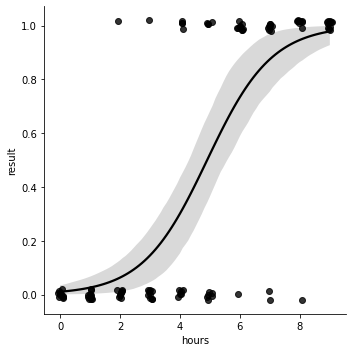

In [241]:
# lmplot 회귀 곡선
sns.lmplot(x="hours", y="result",
           data=test_result, 
           logistic=True,
           scatter_kws={"color": "black"},
           line_kws={"color": "black"},
           x_jitter=0.1, y_jitter=0.02)

In [242]:
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})

# 합격 확률 예측
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

In [244]:
### Odds ratio 계산
# 공부시간 1시간일 때의 합격률
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 공부시간 2시간일 때의 합격률
exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

# Odds
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

# Log Odds ratio -> Parameter
np.log(odds_2 / odds_1)

0    0.92889
dtype: float64

In [245]:
mod_glm.params["hours"]

0.9288901756284946

In [246]:
# Pearson Residual
mod_glm.resid_pearson.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
dtype: float64

In [251]:
# Pearson chi-square statistic
mod_glm.pearson_chi2

84.91138782569973

In [248]:
np.sum(mod_glm.resid_pearson**2)

84.91138782569973

In [249]:
# Deviance Residual
mod_glm.resid_deviance.head(3)

0   -0.144369
1   -0.144369
2   -0.144369
dtype: float64

In [250]:
# Deviance statistic
np.sum(mod_glm.resid_deviance ** 2)

68.02788118117269

In [168]:
from sklearn.datasets import load_iris

In [169]:
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

In [170]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [171]:
# Binary class & 숫자 label로 변경 -> ROC, AUC를 구해보기 위함
iris = iris[iris.Class != 'Setosa']
iris['Class'] = np.where(iris.Class=='Virginica', 1, 0) 

/var/folders/cb/__k37xkx4s324t8t_p2bgr4w0000gn/T/ipykernel_64032/4202410388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['Class'] = np.where(iris.Class=='Virginica', 1, 0)


In [172]:
### sepal length 별 Class 확률
iris.groupby('sepal length (cm)')['Class'].mean()

sepal length (cm)
4.9    0.500000
5.0    0.000000
5.1    0.000000
5.2    0.000000
5.4    0.000000
5.5    0.000000
5.6    0.166667
5.7    0.166667
5.8    0.500000
5.9    0.333333
6.0    0.333333
6.1    0.333333
6.2    0.500000
6.3    0.666667
6.4    0.714286
6.5    0.800000
6.6    0.000000
6.7    0.625000
6.8    0.666667
6.9    0.750000
7.0    0.000000
7.1    1.000000
7.2    1.000000
7.3    1.000000
7.4    1.000000
7.6    1.000000
7.7    1.000000
7.9    1.000000
Name: Class, dtype: float64

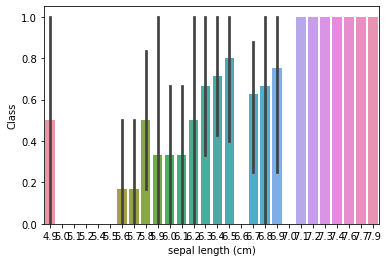

In [173]:
sns.barplot(x="sepal length (cm)", y="Class", data=iris)
plt.show()

In [174]:
iris['sepal_length'] = iris['sepal length (cm)'] # formula 에러 방지

/var/folders/cb/__k37xkx4s324t8t_p2bgr4w0000gn/T/ipykernel_64032/423798933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['sepal_length'] = iris['sepal length (cm)'] # formula 에러 방지


In [175]:
model = smf.glm(formula="Class ~ sepal_length", data=iris, family=sm.families.Binomial())
results = model.fit()

print(results.summary()) # coef에 대해서는 wald test 결과를 보여줌

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55.273
Date:                Sat, 15 Jul 2023   Deviance:                       110.55
Time:                        23:29:45   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2448
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.5708      2.907     -4.325   

In [176]:
results.predict(iris['sepal_length'])

50     0.820495
51     0.577361
52     0.788918
53     0.182473
54     0.625566
         ...   
145    0.714191
146    0.527636
147    0.625566
148    0.477357
149    0.333030
Length: 100, dtype: float64

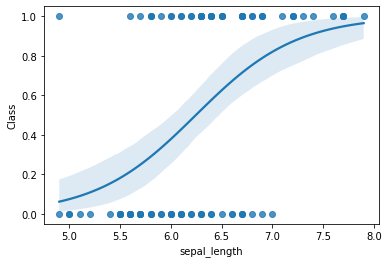

In [177]:
# plot logistic regression curve
sns.regplot(x='sepal_length', y='Class', data=iris, logistic=True, ci=95)
plt.show()

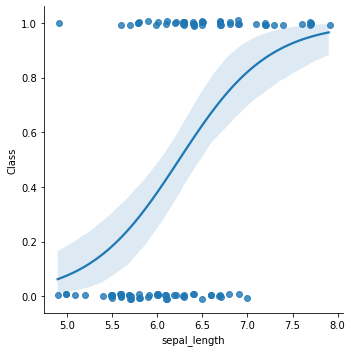

In [178]:
sns.lmplot(x='sepal_length', y='Class', data=iris, logistic=True, ci=95, x_jitter=0.01, y_jitter=0.01) # jitter: data를 흐트리는 옵션
plt.show()

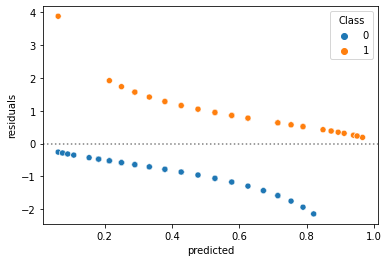

In [179]:
plot_df = pd.DataFrame()
plot_df["predicted"] = results.predict(iris['sepal_length'])
plot_df["residuals"] = results.resid_pearson

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=iris['Class'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [180]:
# pearson chi-sq
print(results.pearson_chi2)
print(np.sum(results.resid_pearson**2))

100.14283284175455
100.14283284175455


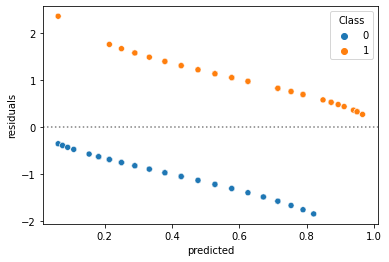

In [181]:
plot_df["residuals"] = results.resid_deviance

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=iris['Class'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [182]:
# summary의 Deviance 값과 일치
# logistic에서는 cross-entropy 개념과 동일
np.sum(results.resid_deviance**2) 

110.54652398942652

In [183]:
### Multiple Logistic
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_sqrt
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4.582576
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4.582576
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4.774935
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,4.626013
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,4.324350


In [184]:
model = smf.glm(formula="vs ~ mpg + am", data=mtcars, family=sm.families.Binomial())
results = model.fit()

print(results.summary()) # coef에 대해서는 wald test 결과를 보여줌

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     vs   No. Observations:                   32
Model:                            GLM   Df Residuals:                       29
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.323
Date:                Sat, 15 Jul 2023   Deviance:                       20.646
Time:                        23:29:52   Pearson chi2:                     20.2
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5159
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7051      4.625     -2.747      0.0

In [185]:
results.aic

26.64629286928622

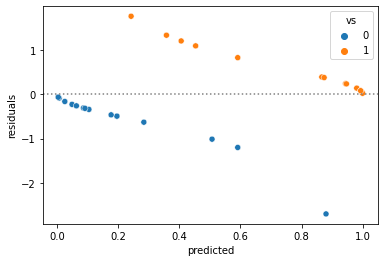

In [186]:
plot_df = pd.DataFrame()
plot_df["predicted"] = results.predict(mtcars.loc[:, ['mpg', 'am']])
plot_df["residuals"] = results.resid_pearson

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=mtcars['vs'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [187]:
results.cov_params()

,Intercept,mpg,am
Intercept,21.392589,-1.155050,4.406337
mpg,-1.155050,0.063693,-0.267584
am,4.406337,-0.267584,2.558336


### (4) Poisson Regression
- 연속형 변수가 카운트 변수에 미치는 영향 파악

In [252]:
# 맥주 판매 개수 예측
beer = pd.read_csv("./stats_for_python/6-5-1-poisson-regression.csv")
beer.head(3)

,beer_number,temperature
0,6,17.5
1,11,26.6
2,2,5.0


In [253]:
# Modeling
mod_pois = smf.glm("beer_number ~ temperature", beer, family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Thu, 03 Aug 2023   Deviance:                       5.1373
Time:                        09:02:52   Pearson chi2:                     5.40
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9708
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [255]:
### Null과 AIC 비교
# Null Model
mod_pois_null = smf.glm("beer_number ~ 1", data=beer, family=sm.families.Poisson()).fit()
print("Null 모델:", mod_pois_null.aic.round(3))
print("변수가 있는 모델:", mod_pois.aic.round(3))

Null 모델: 223.363
변수가 있는 모델: 119.343


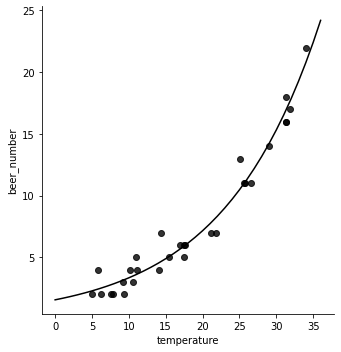

In [257]:
x_plot = np.arange(0, 37)
pred = mod_pois.predict(pd.DataFrame({"temperature": x_plot}))

sns.lmplot(y="beer_number", x="temperature", data=beer, fit_reg = False,
          scatter_kws = {"color":"black"})
sns.lineplot(x=x_plot, y=pred, color="black")
plt.show()

In [258]:
# 기온이 1도일 때 판매 개수 기댓값
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

# 기온이 2도일 때 판매 개수 기댓값
exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

# 비율 확인
pred_2 / pred_1

0    1.079045
dtype: float64

In [259]:
np.exp(mod_pois.params["temperature"])

1.079045054586893

### (5) Bayes Regression

## Reliability Analysis

### (1) Internal consistency
- 주로 조사 데이터에 활용하며, 신뢰성을 평가하여 신뢰성이 낮은 컬럼 제외
- 하나의 개념을 측정하기 위해 여러 개의 하위 측정항목들이 존재할 경우 이들 측정 값 사이의 상관관계를 분석하여 신뢰성을 평가하는 방법
- 크론바흐 알파계수 활용 (계수 >= 0.6 신뢰성이 존재, 계수 >= 0.7신뢰성이 높음)
- 크론바흐 알파계수가 낮을 경우에는 측정 항목들 간의 내적일관성이 떨어지는 것을 의미하므로 다른 측정 항목들과 상관관계가 낮은 측정항목을 제거함으로써 전체적인 측정도구들의 내적일관성을 향상시킬 수 있음
- 하나의 개념에 대해 신뢰성과 타당성을 평가하기 위한 최소의 항목 수는 3개이므로 가급적 모든 개념의 측정 항목 수는 3개 이상으로 유지하는 것이 중요

## Survival Analysis

### (1) Kaplan-Meier

In [2]:
# !pip install lifelines
import lifelines

## Stochestic Process

### (1) Brownian motion

### (2) Poisson Process

### (3) Markov Process / Markov Chain

### (4) MCMC (Markov Chain Monte Carlo)

#### Gibbs Sampler

## Bayesian Analysis

## Association Analysis
- 사건의 연관규칙을 찾는 방법
- A -> B

### (1) Run test
#### One sample

In [188]:
data = ['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b']

test_df = pd.DataFrame(data, columns=["product"])
test_df.head()

,product
0,a
1,a
2,b
3,b
4,a


귀무가설(H0) <br>
연속적인 관측값이 임의적이다.<br>
대립가설(H1)<br>
연속적인 관측값이 임의적이지 않다 (연관이 있다).<br>

In [189]:
from statsmodels.sandbox.stats.runs import runstest_1samp

In [190]:
# Run-test를 위한 데이터 변환 
test_df.loc[test_df['product']=='a', 'product']=1
test_df.loc[test_df['product']=='b', 'product']=0

# Perform Runs test
runstest_1samp(test_df['product'], cutoff=0.5, correction=True)

(-1.1144881152070183, 0.26506984027306035)

[결과해석]
P-value가 유의수준 (0.05)보다 크므로 귀무가설을 기각하지 않는다. 즉, 상품 a와 b의 구매에는 연관이 없다.

#### Two sample
- 두 표본이 같은 분포에서 나왔는지 테스트
- Wald–Wolfowitz Run test

H0: The two populations have the same distribution. <br>
H1: The two populations have different distributions. 

In [1]:
from statsmodels.sandbox.stats.runs import runstest_2samp

In [6]:
x = [31.8, 32.8, 39.2, 36, 30, 34.5, 37.4]
y = [35.5, 27.6, 21.3, 24.8, 36.7, 30]

res = runstest_2samp(x, y)
res

ties detected


(0.022428065200812752, 0.9821064931864921)

[결과해석]
P-value가 유의수준 (0.05)보다 크므로 귀무가설을 기각하지 않는다. 즉, x와 y는 같은 분포에서 온 것으로 볼 수 있다.

### (2) Association rules
- 조건-결과 식으로 표현되는 유용한 패턴을 발견해 내는 것
- 장바구니분석, 서열분석
- 간단하지만, 품목수가 많으면 계산량이 기하급수적으로 증가하므로, 적절한 품목 결정 필요
- 측정 지표
    - 지지도 (Support): 전체 거래 중 품목 A, B가 동시에 포함되는 거래의 비율. 전체 구매 경향 파악
    - 신뢰도 (Confidence): 품목 A가 포함된 거래 중 A, B가 동시에 포함되는 거래의 비율. A -> B 연관성 정도
    - 향상도 (Lift): 품목 B를 구매한 고객 중, A를 구매한 후 B를 구매할 확률. 1이면 A, B가 독립, 1보다 크면 양의 상관관계
- Apriori 알고리즘
    - 계산량을 줄이기 위해, 빈발집합(Frequent Item Sets)만을 고려해서 연관 규칙 생성
    - Frequent Item set: 최소지지도 이상의 지지도 값을 갖는 item

In [191]:
# !pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder

In [192]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

te = TransactionEncoder() # Transaction 형태로 변환
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [193]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [194]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [195]:
### 지지도 60 % 이상인 품목만 추출 
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)


In [196]:
### 규칙의 길이를 추출하는 방법 
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Apple, Beer)",2
5,0.375,"(Milk, Beer)",2
6,0.500,"(Rice, Beer)",2


In [197]:
df = pd.read_csv('./ADP_book_ver01/data/groceries.csv',)
df

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [198]:
### Comma로 데이터 분할
df_split = df.iloc[:, 0].str.split(',', expand=True)
df_split.values

array([['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ['pip fruit', 'yogurt', 'cream cheese', ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [199]:
### None 제거
df_split_ary = df_split.values
groceries = []
for i in range(len(df_split_ary)) : 
    temp = list(filter(None, df_split_ary[i]))
    groceries.append(temp)

In [200]:
te = TransactionEncoder()
groceries_tr = te.fit(groceries).transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns=te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [201]:
# 지지도가 5% 이상인 빈번 항목 집합 탐색
groceries_ap = apriori(groceries_tr, min_support=0.05, use_colnames=True)
groceries_ap

,support,itemsets
0,0.052471,(beef)
1,0.080537,(bottled beer)
2,0.110535,(bottled water)
3,0.064877,(brown bread)
4,0.055420,(butter)
5,0.077690,(canned beer)
6,0.082672,(citrus fruit)
7,0.058064,(coffee)
8,0.053285,(curd)
9,0.063453,(domestic eggs)


In [202]:
# 신뢰도가 0.3 이상인 빈번 항목 집합 탐색
association_rules(groceries_ap, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.193512,0.255542,0.074842,0.386758,1.513480,0.025392,1.213971,0.420677
1,(rolls/buns),(whole milk),0.183954,0.255542,0.056640,0.307905,1.204909,0.009632,1.075659,0.208397
2,(yogurt),(whole milk),0.139516,0.255542,0.056030,0.401603,1.571575,0.020378,1.244088,0.422664


In [203]:
rules = association_rules(groceries_ap, metric="lift", min_threshold=1)

# 규칙의 길이 컬럼 생성 
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,(other vegetables),(whole milk),0.193512,0.255542,0.074842,0.386758,1.513480,0.025392,1.213971,0.420677,1
1,(whole milk),(other vegetables),0.255542,0.193512,0.074842,0.292877,1.513480,0.025392,1.140520,0.455729,1
2,(rolls/buns),(whole milk),0.183954,0.255542,0.056640,0.307905,1.204909,0.009632,1.075659,0.208397,1
3,(whole milk),(rolls/buns),0.255542,0.183954,0.056640,0.221647,1.204909,0.009632,1.048428,0.228437,1
4,(yogurt),(whole milk),0.139516,0.255542,0.056030,0.401603,1.571575,0.020378,1.244088,0.422664,1
5,(whole milk),(yogurt),0.255542,0.139516,0.056030,0.219260,1.571575,0.020378,1.102139,0.488538,1


In [204]:
rules[(rules['antecedent_len'] >=1) & (rules['confidence'] >=0.4) & (rules['lift'] >=1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
4,(yogurt),(whole milk),0.139516,0.255542,0.05603,0.401603,1.571575,0.020378,1.244088,0.422664,1


In [205]:
### Adult data
adult = pd.read_csv('./data/adult.csv')
adult.head()

,items,transactionID
0,"{age=Middle-aged,workclass=State-gov,education...",1
1,"{age=Senior,workclass=Self-emp-not-inc,educati...",2
2,"{age=Middle-aged,workclass=Private,education=H...",3
3,"{age=Senior,workclass=Private,education=11th,m...",4
4,"{age=Middle-aged,workclass=Private,education=B...",5


In [206]:
adult['items'][0]

'{age=Middle-aged,workclass=State-gov,education=Bachelors,marital-status=Never-married,occupation=Adm-clerical,relationship=Not-in-family,race=White,sex=Male,capital-gain=Low,capital-loss=None,hours-per-week=Full-time,native-country=United-States,income=small}'

In [207]:
### Comma로 데이터 분할
adult['items'] = adult['items'].str.replace('{', '')
adult['items'] = adult['items'].str.replace('}', '')
adult_split = adult['items'].str.split(',', expand=True)
adult_split.values

/var/folders/cb/__k37xkx4s324t8t_p2bgr4w0000gn/T/ipykernel_64032/357720133.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adult['items'] = adult['items'].str.replace('{', '')
/var/folders/cb/__k37xkx4s324t8t_p2bgr4w0000gn/T/ipykernel_64032/357720133.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adult['items'] = adult['items'].str.replace('}', '')


array([['age=Middle-aged', 'workclass=State-gov', 'education=Bachelors',
        ..., 'hours-per-week=Full-time', 'native-country=United-States',
        'income=small'],
       ['age=Senior', 'workclass=Self-emp-not-inc',
        'education=Bachelors', ..., 'hours-per-week=Part-time',
        'native-country=United-States', 'income=small'],
       ['age=Middle-aged', 'workclass=Private', 'education=HS-grad', ...,
        'hours-per-week=Full-time', 'native-country=United-States',
        'income=small'],
       ...,
       ['age=Middle-aged', 'workclass=Private', 'education=Bachelors',
        ..., 'hours-per-week=Over-time', 'native-country=United-States',
        None],
       ['age=Middle-aged', 'workclass=Private', 'education=Bachelors',
        ..., 'hours-per-week=Full-time', 'native-country=United-States',
        None],
       ['age=Middle-aged', 'workclass=Self-emp-inc',
        'education=Bachelors', ..., 'hours-per-week=Over-time',
        'native-country=United-States', No

In [208]:
### None 제거
adult_split_ary = adult_split.values
adult_list = []
for i in range(len(adult_split_ary)) : 
    temp = list(filter(None, adult_split_ary[i]))
    adult_list.append(temp)

In [209]:
te = TransactionEncoder()
adult_tr = te.fit(adult_list).transform(adult_list)
adult_tr = pd.DataFrame(adult_tr, columns=te.columns_)
adult_tr

,age=Middle-aged,age=Old,age=Senior,age=Young,capital-gain=High,capital-gain=Low,capital-gain=None,capital-loss=High,capital-loss=Low,capital-loss=None,...,sex=Female,sex=Male,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Private,workclass=Self-emp-inc,workclass=Self-emp-not-inc,workclass=State-gov,workclass=Without-pay
0,True,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False
48838,False,False,True,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
48839,True,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
48840,True,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [210]:
# 지지도가 10% 이상인 빈번 항목 집합 탐색
adult_ap = apriori(adult_tr, min_support=0.1, use_colnames=True)
adult_ap

,support,itemsets
0,0.505119,(age=Middle-aged)
1,0.260862,(age=Senior)
2,0.197105,(age=Young)
3,0.917387,(capital-gain=None)
4,0.953278,(capital-loss=None)
...,...,...
2611,0.110172,"(race=White, relationship=Husband, income=smal..."
2612,0.176999,"(race=White, relationship=Husband, marital-sta..."
2613,0.102821,"(race=White, relationship=Husband, marital-sta..."
2614,0.108595,"(race=White, relationship=Husband, marital-sta..."


In [211]:
# 신뢰도가 0.6 이상인 빈번 항목 집합 탐색
ar = association_rules(adult_ap, metric="confidence", min_threshold=0.6)
ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(age=Middle-aged),(capital-gain=None),0.505119,0.917387,0.463208,0.917028,0.999609,-0.000181,0.995678,-0.000790
1,(age=Middle-aged),(capital-loss=None),0.505119,0.953278,0.480079,0.950428,0.997010,-0.001440,0.942502,-0.006023
2,(hours-per-week=Over-time),(age=Middle-aged),0.259531,0.505119,0.156873,0.604449,1.196649,0.025779,1.251120,0.221931
3,(age=Middle-aged),(native-country=United-States),0.505119,0.897424,0.448876,0.888655,0.990228,-0.004430,0.921239,-0.019551
4,(age=Middle-aged),(race=White),0.505119,0.855043,0.425351,0.842082,0.984842,-0.006547,0.917926,-0.030163
...,...,...,...,...,...,...,...,...,...,...
22041,"(age=Middle-aged, capital-loss=None, workclass...","(race=White, relationship=Husband, capital-gai...",0.167090,0.296937,0.105667,0.632398,2.129737,0.056052,1.912566,0.636874
22042,"(age=Middle-aged, workclass=Private, capital-g...","(race=White, relationship=Husband, capital-los...",0.159125,0.316142,0.105667,0.664050,2.100483,0.055361,2.035598,0.623064
22043,"(age=Middle-aged, native-country=United-States...","(race=White, relationship=Husband, capital-los...",0.156791,0.297736,0.105667,0.673936,2.263538,0.058985,2.153761,0.662011
22044,"(age=Middle-aged, workclass=Private, sex=Male,...","(race=White, relationship=Husband, capital-los...",0.157221,0.274661,0.105667,0.672093,2.446989,0.062485,2.212024,0.701648


In [212]:
# 특정 consequents 찾기
ar[(ar.consequents == frozenset({'income=small'})) | (ar.consequents == frozenset({'income=large'}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,(age=Young),(income=small),0.197105,0.506122,0.128926,0.654098,1.292372,0.029167,1.427797,0.281767
116,(marital-status=Never-married),(income=small),0.329982,0.506122,0.208673,0.632376,1.249454,0.041662,1.343432,0.297978
119,(relationship=Own-child),(income=small),0.155215,0.506122,0.102391,0.659676,1.303393,0.023834,1.451198,0.275539
353,"(capital-gain=None, age=Young)",(income=small),0.191393,0.506122,0.125691,0.656718,1.297549,0.028823,1.438695,0.283594
373,"(capital-loss=None, age=Young)",(income=small),0.192560,0.506122,0.126182,0.655290,1.294727,0.028724,1.432734,0.281924
...,...,...,...,...,...,...,...,...,...,...
14497,"(race=White, capital-loss=None, capital-gain=N...",(income=small),0.176139,0.506122,0.108513,0.616064,1.217225,0.019365,1.286356,0.216613
15756,"(race=White, marital-status=Never-married, cap...",(income=small),0.181504,0.506122,0.117501,0.647377,1.279094,0.025638,1.400586,0.266582
15786,"(race=White, capital-gain=None, sex=Female, na...",(income=small),0.168011,0.506122,0.102473,0.609920,1.205085,0.017439,1.266093,0.204549
16659,"(race=White, marital-status=Never-married, cap...",(income=small),0.184186,0.506122,0.117931,0.640285,1.265080,0.024711,1.372969,0.256843


In [213]:
# frozenset data extract
[i for i in ar.consequents[0]]

['capital-gain=None']

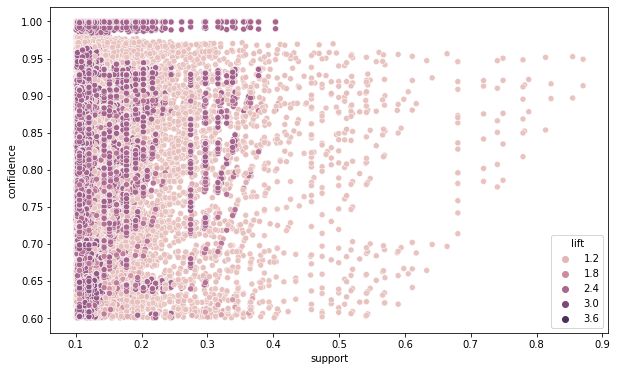

In [214]:
# 성능변수 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ar['support'], y=ar['confidence'], hue=ar['lift'])
plt.show()

In [215]:
import networkx as nx

In [216]:
### Visualize network
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
   
    color_map = []
    colors = np.random.rand(rules_to_show)    
    strs = ["R"+str(i+1) for i in range(rules_to_show + 2)]
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
     
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight=2)
       
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
    print(len(colors))
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

20


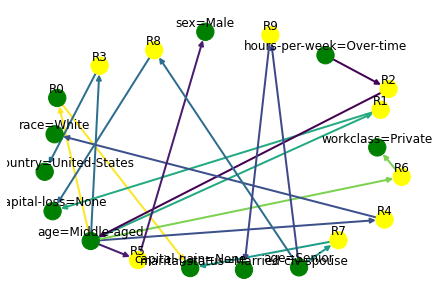

In [217]:
draw_graph(ar, 10)

## Time-Series Analysis
- 시간에 흐름에 따른 데이터 분석
- 미래의 변화에 대한 추세 분석
- 정상성
    - 평균이 일정
    - 분산이 시점과 독립
    - 공분산은 시차에만 의존
- Log transformation(분산 변동폭 제거), Differencing(추세와 계절성 제거)

### (1) ARIMA
- AR(Autoregressive): 현 시점의 자료가 p 시점 전의 유한개의 과거 자료로 설명됨. AR(p)
- MA(Moving Average): 현 시점의 자료를 백색잡음의 선형결함으로 표현하며, 항상 정상성이 만족됨. MA(q)
- AR 모형은 ACF가 연속적인 (감소) 형태, PACF가 p+1 시차에서 절단된 형태
- MA 모형은 PACF가 연속적인 형태, ACF가 p+1 시차에서 절단된 형태

In [218]:
arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
arima_data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [219]:
arima_data['day'] = pd.to_datetime(arima_data['day'], format="%Y-%m-%d")
arima_data.set_index('day', inplace=True)
arima_data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


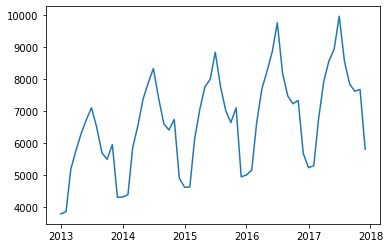

In [220]:
plt.plot(arima_data.index, arima_data['price'])
plt.show()

In [221]:
# Train, Test 데이터 구분
training = arima_data[:"2016-12-01"]
test = arima_data.drop(training.index)

귀무가설(H0) <br>
데이터가 정상성을 갖지 않는다.<br>
대립가설(H1)<br>
데이터가 정상성을 갖는다.<br>

In [222]:
from statsmodels.tsa.stattools import adfuller

In [223]:
### 정상성 검정
adf = adfuller(training, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -1.9997199341327438
p-value : 0.6015863303794374


In [224]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<AxesSubplot:xlabel='day'>

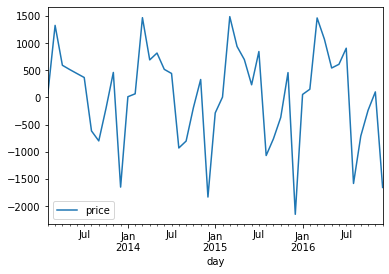

In [225]:
### 차분 실행
diff_data = training.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


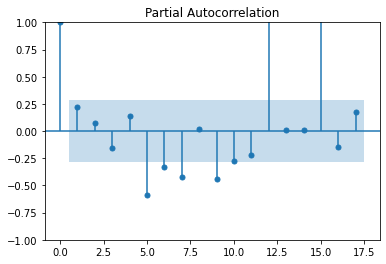

In [226]:
plot_pacf(diff_data) # AR(p)의 값 확인 가능?
plt.show()

In [227]:
from statsmodels.tsa.arima.model import ARIMA

In [228]:
model = ARIMA(training, order=(2, 1, 2))
res = model.fit()
res.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive par

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Sat, 15 Jul 2023   AIC                            761.750
Time:                        23:30:03   BIC                            771.000
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3168      0.189     -6.970      0.000      -1.687      -0.947
ar.L2         -0.3192      0.190     -1.683      0.092      -0.691       0.053
ma.L1          1.9711      0.241      8.195      0.000       1.500       2.443
ma.L2          0.9961      0.239      4.168      0.000       0.528       1.465
sigma2      4.447e+05   1.11e-06      4e+11      0.000    4.45e+05    4.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.82e+26. Standard errors may be unstable.
"""

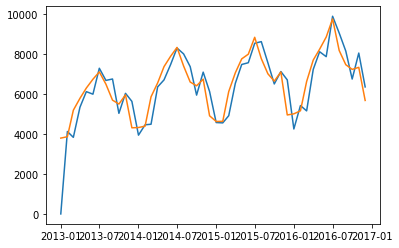

In [229]:
plt.plot(res.predict())
plt.plot(training)

In [230]:
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측합니다.
forecast_data = res.forecast(steps=len(test), alpha=0.05) 

pred_y = forecast_data
pred_y

2017-01-01    5830.868987
2017-02-01    5508.634583
2017-03-01    5884.167944
2017-04-01    5492.512278
2017-05-01    5888.384640
2017-06-01    5492.106038
2017-07-01    5887.573563
2017-08-01    5493.303775
2017-09-01    5886.255241
2017-10-01    5494.657460
2017-11-01    5884.893482
2017-12-01    5496.018563
Freq: MS, Name: predicted_mean, dtype: float64

In [231]:
test_y = test # 실제 데이터
test_y

,price
day,
2017-01-01,5236
2017-02-01,5299
2017-03-01,6744
2017-04-01,7927
2017-05-01,8561
2017-06-01,8930
2017-07-01,9960
2017-08-01,8548
2017-09-01,7843


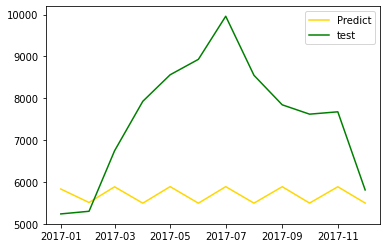

In [232]:
plt.plot(pred_y, color="gold", label='Predict') # 모델이 예상한 가격 그래프
plt.plot(test_y, color="green" , label='test') # 실제 가격 그래프
plt.legend()
plt.show()

In [233]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [234]:
print("r2_score : ", r2_score(test_y, pred_y))
RMSE = mean_squared_error(test_y, pred_y)**0.5
print("RMSE : " , RMSE)

r2_score :  -1.6425726376790446
RMSE :  2302.0574524839035


In [235]:
### Nile강 data
nile = pd.read_csv('./r_csv/datasets/Nile.csv').drop('Unnamed: 0', axis=1)
nile.set_index('time', inplace=True)
nile.head()

,value
time,
1871,1120
1872,1160
1873,963
1874,1210
1875,1160


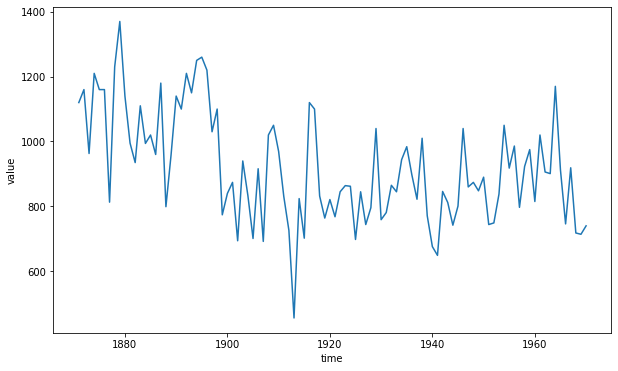

In [236]:
plt.figure(figsize=(10,6))
sns.lineplot(x='time', y='value', data=nile)
plt.show()

In [237]:
### 정상성 검정 -> 만족
adf = adfuller(nile, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -4.7907655179831234
p-value : 0.0004861430290081328


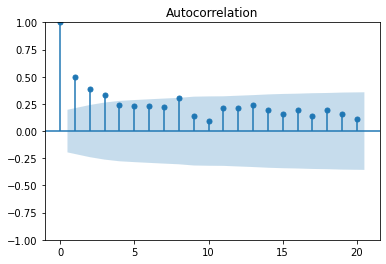

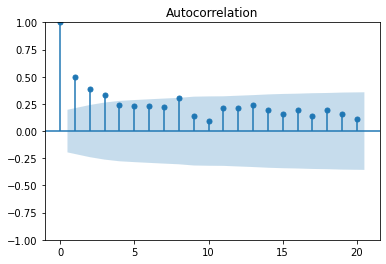

In [238]:
plot_acf(nile) # MA(q)의 값 확인 가능?

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


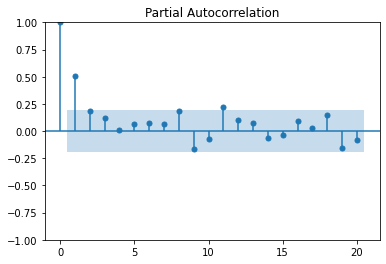

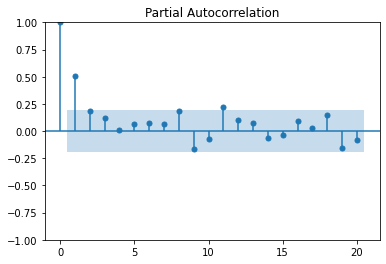

In [239]:
plot_pacf(nile) # AR(p)의 값 확인 가능?

In [240]:
model = ARIMA(nile, order=(2, 0, 1))
res = model.fit()
res.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -636.269
Date:                Sat, 15 Jul 2023   AIC                           1282.538
Time:                        23:30:04   BIC                           1295.564
Sample:                             0   HQIC                          1287.810
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        934.4066     77.600     12.041      0.000     782.314    1086.499
ar.L1          1.2100      0.151      8.000      0.000       0.914       1.507
ar.L2         -0.2359      0.133     -1.773      0.076      -0.497       0.025
ma.L1         -0.8431      0.102     -8.287      0.000      -1.043      -0.644
sigma2      1.954e+04   3019.272      6.473      0.000    1.36e+04    2.55e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.84   Prob(JB):                         0.89
Heteroskedasticity (H):               0.61   Skew:                            -0.02
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [241]:
forecast_data = res.forecast(steps=10, alpha=0.05) 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [242]:
pred_y = forecast_data
pred_y.index = range(1971, 1981) # index 조정

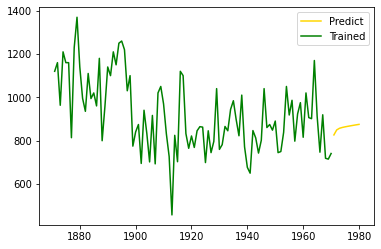

In [243]:
plt.plot(pred_y, color="gold", label='Predict') # 모델이 예상한 가격 그래프
plt.plot(nile['value'], color="green" , label='Trained') # 실제 가격 그래프
plt.legend()
plt.show()

### (2) SARIMA

In [244]:
# !pip install pmdarima
from pmdarima import auto_arima

In [245]:
auto_model = auto_arima(training, start_p=0, d=1, start_q=0,
                        max_p=3, max_q=3, 
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.04 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [246]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sat, 15 Jul 2023   AIC                            480.687
Time:                                     23:30:06   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [247]:
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측
auto_pred_y = pd.DataFrame(auto_model.predict(n_periods=len(test)), index=test.index) 
auto_pred_y.columns = ['predicted_price']
auto_pred_y

,predicted_price
day,
2017-01-01,5609.436979
2017-02-01,5761.436979
2017-03-01,7225.436979
2017-04-01,8298.436979
2017-05-01,8841.436979
2017-06-01,9452.436979
2017-07-01,10359.436979
2017-08-01,8777.436979
2017-09-01,8068.436979


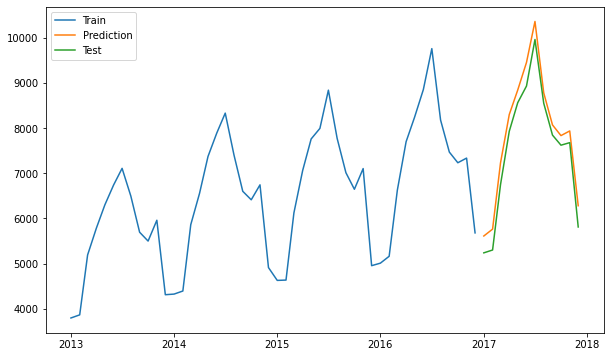

In [248]:
plt.figure(figsize=(10,6))
plt.plot(training, label="Train") # Train 데이터 
plt.plot(auto_pred_y, label="Prediction") # 모델이 예상한 그래프 
plt.plot(test, label="Test") # 실제 가격 그래프 
plt.legend(loc='upper left')
plt.show()

In [249]:
print("r2_score : ", r2_score(test_y, auto_pred_y))
RMSE = mean_squared_error(test_y, auto_pred_y)**0.5
print("RMSE : " , RMSE)

r2_score :  0.9305467061841242
RMSE :  373.2064274724195


### (3) MARIMA
- Multi-variate ARIMA